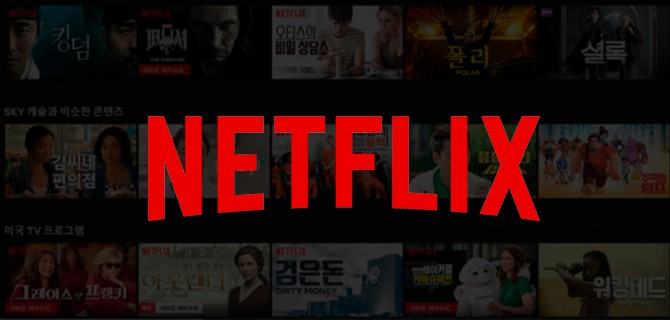

# Netflix의 다음 컨텐츠는 뭐가 좋을까??

- 넷플릭스의 컨텐츠들의 특징을 알아보자
- 다른 플랫폼과의 차이를 비교하여 각 전략에 대해 파악하여 넷플릭스가 강화하면 좋은 컨텐츠 전략에 대해 인사이트를 도출해보자

https://www.kaggle.com/datasets/shivamb/netflix-shows



#1 데이터셋 확인 
### (1) 필요 데이터 호출 및 데이터 확인하기
**컬럼**

1. show_id : 고유 번호
2. type : movie / tv show
3. title : 제목
4. director : 영화 감독
5. cast : 배우
6. country : 만든 나라
7. date_added : 넷플릭스에 올라온 날짜
8. release_year : 실제 개봉 또는 방영 날짜
9. rating : 관람 연령 등급
10. duration : 러닝타임 및 시리즈 수
11. listed_in : 장르
12. description : 내용 요약

In [199]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install koreanize-matplotlib
import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [201]:
#laod data
path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL/'
df = pd.read_csv(path+'netflix_titles.csv')

In [202]:
#copy data
df1 = df.copy()
df1.info()
#director, cast, country, date_added, rating, duration 에 결측이 있음.
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [203]:
df1['type'].nunique()

2

## (1) show id

In [204]:
# show_id 컬럼 확인
df1['show_id'].value_counts()

s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: show_id, Length: 8807, dtype: int64

## (2) type

In [205]:
# type 컬럼 확인
df1['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

type은 TV Show와 Movie 두 가지로만 나뉘고 결측치 또한 없다. 자료가 두 개로만 나뉘기 때문에 원핫인코딩을 통해 나누어 파악하거나 데이터 자체를 나누어도 될 것 같다.

## (3) title

In [206]:
# title 컬럼 확인
df1['title'].value_counts()

Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64

## (4) director

In [207]:
# directior 확인
df1['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [208]:
df1['director'].isnull().sum()

2634

- directior 컬럼은 값이 4528개로 중복값이 존재하고 2634개의 많은 결측치가 존재한다.  
- 영화 감독에 대한 컬럼이기 때문에 tv쇼와 movie로 나누어서 각각에 대한 결측치를 확인하고 데이터 처리를 진행해야 할 것 같다.  
- 그 후 많이 카운팅되는 감독에 대해서도 확인해 보면 좋을 것 같다.

## (5) cast

In [209]:
# cast 컬럼 확인
df1['cast'].value_counts()

David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                                   

In [210]:
df1['cast'].isnull().sum()

825

## (6) country

In [211]:
# country 컬럼 확인
df1['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

- 결측치 채우기 어떤 방법으로 할 지 고민해보기  
- 나라는 앞에 있는게 주 제작 나라인 경우가 많기 때문에 슬라이싱을 통해 앞에 있는 나라만 선택하여 넣는 것으로 한다.

## (7) date_added

In [212]:
# date_added 넷플릭스에 올라온 날짜
df1['date_added'].value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

- 넷플릭스에 업로드 된 날짜는 데이터타입을 int로 바꾸고, 
- 날짜 별로 확인하려면 실제 공개날짜가 아닌 넷플릭스에 공개된 날짜로 기준을 두고 보는 것이 넷플릭스에서 원하게 된? 추세를 확인할 수 있기에 이 컬럼을 기준으로 다른 컬럼을 확인하는 것이 좋을 것 같다.
- 또한 결측치 10개가 있는데 이는 전체 데이터에 0.1% 정도밖에 차지하지 않으므로 삭제해 주어도 될 것 같다. 
- 또는 release_time을 참고해보거나 검색을 통해 결측치를 채우기로 하자. 

## (8) release_year

In [213]:
# release_year
df1['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

넷플릭스 업로드 시점으로 어떤 연도의 작품들이 많아지고 있는지? 를 확인해 보아도 좋을 것같다.

##(9) rating

**관람 등급**
1. TV-MA :  17세 이상 관람가
2. TV-14 :14세 이상 관람가
3. TV-PG : 부모의 조언이 필요한 관람가. 일부 콘텐츠에서 경고 및 부모의 조언이 필요
4. R : 17세 미만 관람 불가
5. PG-13 : 13세 이상 관람가
6. TV-Y7 : 7세 이상 관람가
7. TV-Y : 모든 연령 시청가
8. PG : 부모의 조언이 권장되는 관람가
9. TV-G : 모든 연령 시청가
10. NR : 등급 지정되지 않음
11. G : 모든 연령 시청가
12. TV-Y70FY :7세 이상 관람가. 어린이 대상 콘텐츠,  일부 콘텐츠에서 미약한 폭력과 공포가 포함
13. NC-17 : 17세 미만의 어린이가 보기에 부적절한 과격한 성적 표현이나 폭력적인 장면 등이 포함된 영화, TV 프로그램 등의 등급(최고 등급의 제한)
14. UR : 등급이 부여되지 않은 작품

In [214]:
# rating
df1['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

관람 등급인데 duration 정보가 3개 들어있다. duration 컬럼에 결측치가 3개 있는 것을 확인했는데 그에 해당하는 정보인지 확인하고 결측치 채우기 및 데이터 삭제를 진행한다.

## (10) duration

In [215]:
# duration

df1['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

영화와 티비쇼를 나누어 각각 러닝타임과 시리즈 개수로 잘 나뉘어 있는지 확인하고 그에 맞게 데이터 처리를 진행해주어야 할 것 같다.

## (11) listed_in : genre

In [216]:
# Listed_in : 장르 알아보기
df1['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [217]:
#컬럼명 바꾸자 장르로 
df1.rename(columns ={'listed_in' : 'genre'}, inplace = True)

## (12) description

In [218]:
# description
df1['description'].value_counts()

Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Secrets bubble to the surface after a sensual encounter and an unforeseen crime entangle two friends and a woman caught between them.                        2
                                                                                                                                                            ..
Sent away to evade an arranged marriage, a 14-

놀랍게도 내용 요약인데 겹치는 데이터들이 있다. 아마 시리즈물에 대해서 그런 것이 아닐까 생각이 든다. 
description에서는 띄어쓰기를 기준으로 슬라이싱을 진행해 이 중 가장 많이 나오는 단어를 확인하여 어떤 내용, 키워드의 작품이 많은지 확인해보면 좋을 것 같다.
___
위에서 모든 컬럼들을 살펴보았다. 이제 각 컬럼을 사용하여 유의미한 데이터를 얻어보자. 

In [219]:
df1

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                                  genre  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

#2 결측치 처리

##(1) country
- 831개의 결측치는 위의 행의 값으로 채우기로..

In [220]:
df1.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64

In [221]:
a = df1['country'].value_counts()
pd.DataFrame(a)

country
United States                              2818
India                                       972
United Kingdom                              419
Japan                                       245
South Korea                                 199
...                                         ...
Romania, Bulgaria, Hungary                    1
Uruguay, Guatemala                            1
France, Senegal, Belgium                      1
Mexico, United States, Spain, Colombia        1
United Arab Emirates, Jordan                  1

[748 rows x 1 columns]

In [222]:
df1['country'] = df1['country'].fillna(method='ffill')
df1.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64

##(2) date_added

In [223]:
df1.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64

In [224]:
df1['date_added'].iloc[6066] = '2014'
df1['date_added'].iloc[6174] = '2020'
df1['date_added'].iloc[6795] = '2011'
df1['date_added'].iloc[6806] = '2015'
df1['date_added'].iloc[6901] = '2016'
df1['date_added'].iloc[7196] = '2017'
df1['date_added'].iloc[7254] = '2015' # 7)
df1['date_added'].iloc[7406] = '2015' # 8)
df1['date_added'].iloc[7847] = '2014' # 9)
df1['date_added'].iloc[8182] = '2014' # 10)

#참고 : 넷플릭스에서 제공하는 사이트 https://usa.newonnetflix.info/info/

In [225]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  genre         8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [226]:
# #datetime_added 결측치 약 0.1% 지우자
# df1 = df1.dropna(subset=["date_added"])
# df1 = df1.reset_index(drop=True)
# df1

##(3) duration
- 결측치가 3개 있는 행을 추출하여 보았더니 rating에 duration 값이 있음. 

In [227]:
df1[df1['duration'].isnull()]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration   genre                                        description  
5541      NaN  Movies  Louis C.K. muses on religion, eternal love, gi...  
5794      NaN  Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813      NaN  Movies  The comic puts his trademark hilarious/thought...

In [228]:
df1.loc[[5541, 5794, 5813], ['duration']] = '74 min','84 min','66 min'
df1.loc[[5541, 5794, 5813]]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration   genre                                        description  
5541   74 min  Movies  Louis C.K. muses on religion, eternal love, gi...  
5794   84 min  Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813   66 min  Movies  The comic puts his trademark hilarious/thought...

##(4) rating
- 4개의 결측치가 있다고 나오고 잘못 입력된 3개 포함하면 실제로 총 7개의 결측기가 있음. 

In [229]:
df1[df1['rating'].isnull()]

show_id     type                                              title  \
5989   s5990    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
6827   s6828  TV Show                  Gargantia on the Verdurous Planet   
7312   s7313  TV Show                                       Little Lunch   
7537   s7538    Movie                               My Honor Was Loyalty   

             director                                               cast  \
5989              NaN                        Oprah Winfrey, Ava DuVernay   
6827              NaN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
7312              NaN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
7537  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

            country        date_added  release_year rating  duration  \
5989  United States  January 26, 2017          2017    NaN    37 min   
6827          Japan  December 1, 2016          2013    NaN  1 Season   
7312      Australia  February 1, 2018          2015    NaN  1 Season   
7537          Italy     March 1, 2017          2015    NaN   115 min   

                                     genre  \
5989                                Movies   
6827  Anime Series, International TV Shows   
7312                 Kids' TV, TV Comedies   
7537                                Dramas   

                                            description  
5989  Oprah Winfrey sits down with director Ava DuVe...  
6827  After falling through a wormhole, a space-dwel...  
7312  Adopting a child's perspective, this show take...  
7537  Amid the chaos and horror of World War II, a c...

In [230]:
df1.loc[[5541, 5794, 5813, 5989, 7537, 6827, 7312], ['rating']] = 'TV-MA','R','R','TV-PG','R', 'R','TV-MA'
df1.loc[[5541, 5794, 5813, 5989, 7537, 6827, 7312]]

show_id     type                                              title  \
5541   s5542    Movie                                    Louis C.K. 2017   
5794   s5795    Movie                              Louis C.K.: Hilarious   
5813   s5814    Movie               Louis C.K.: Live at the Comedy Store   
5989   s5990    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
7537   s7538    Movie                               My Honor Was Loyalty   
6827   s6828  TV Show                  Gargantia on the Verdurous Planet   
7312   s7313  TV Show                                       Little Lunch   

             director                                               cast  \
5541       Louis C.K.                                         Louis C.K.   
5794       Louis C.K.                                         Louis C.K.   
5813       Louis C.K.                                         Louis C.K.   
5989              NaN                        Oprah Winfrey, Ava DuVernay   
7537  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   
6827              NaN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
7312              NaN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   

            country          date_added  release_year rating  duration  \
5541  United States       April 4, 2017          2017  TV-MA    74 min   
5794  United States  September 16, 2016          2010      R    84 min   
5813  United States     August 15, 2016          2015      R    66 min   
5989  United States    January 26, 2017          2017  TV-PG    37 min   
7537          Italy       March 1, 2017          2015      R   115 min   
6827          Japan    December 1, 2016          2013      R  1 Season   
7312      Australia    February 1, 2018          2015  TV-MA  1 Season   

                                     genre  \
5541                                Movies   
5794                                Movies   
5813                                Movies   
5989                                Movies   
7537                                Dramas   
6827  Anime Series, International TV Shows   
7312                 Kids' TV, TV Comedies   

                                            description  
5541  Louis C.K. muses on religion, eternal love, gi...  
5794  Emmy-winning comedy writer Louis C.K. brings h...  
5813  The comic puts his trademark hilarious/thought...  
5989  Oprah Winfrey sits down with director Ava DuVe...  
7537  Amid the chaos and horror of World War II, a c...  
6827  After falling through a wormhole, a space-dwel...  
7312  Adopting a child's perspective, this show take...

In [231]:
df1.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
dtype: int64

- director, cast 이외에 결측치 처리 완료

##(5) cast, director
unknown


In [232]:
df1['cast'] = df1['cast'].fillna('unknown')
df1['director'] = df1['director'].fillna('unknown')
df1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genre           0
description     0
dtype: int64

#3 컬럼 정리

##(1) year_added
- datetime_added를 통해 

In [233]:
df1['datetime_added']=pd.to_datetime(df1['date_added'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8807 non-null   object        
 1   type            8807 non-null   object        
 2   title           8807 non-null   object        
 3   director        8807 non-null   object        
 4   cast            8807 non-null   object        
 5   country         8807 non-null   object        
 6   date_added      8807 non-null   object        
 7   release_year    8807 non-null   int64         
 8   rating          8807 non-null   object        
 9   duration        8807 non-null   object        
 10  genre           8807 non-null   object        
 11  description     8807 non-null   object        
 12  datetime_added  8807 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 894.6+ KB


In [234]:
df1['YearMonth_added'] = df1['datetime_added'].dt.strftime('%Y-%m')
df1['YearMonth_added']=pd.to_datetime(df1['YearMonth_added'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          8807 non-null   object        
 1   type             8807 non-null   object        
 2   title            8807 non-null   object        
 3   director         8807 non-null   object        
 4   cast             8807 non-null   object        
 5   country          8807 non-null   object        
 6   date_added       8807 non-null   object        
 7   release_year     8807 non-null   int64         
 8   rating           8807 non-null   object        
 9   duration         8807 non-null   object        
 10  genre            8807 non-null   object        
 11  description      8807 non-null   object        
 12  datetime_added   8807 non-null   datetime64[ns]
 13  YearMonth_added  8807 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1

In [235]:
df1['year_added'] = df1['datetime_added'].dt.strftime('%Y')
# df1['year_added'] = df1['year_added'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          8807 non-null   object        
 1   type             8807 non-null   object        
 2   title            8807 non-null   object        
 3   director         8807 non-null   object        
 4   cast             8807 non-null   object        
 5   country          8807 non-null   object        
 6   date_added       8807 non-null   object        
 7   release_year     8807 non-null   int64         
 8   rating           8807 non-null   object        
 9   duration         8807 non-null   object        
 10  genre            8807 non-null   object        
 11  description      8807 non-null   object        
 12  datetime_added   8807 non-null   datetime64[ns]
 13  YearMonth_added  8807 non-null   datetime64[ns]
 14  year_added       8807 non-null   object 

In [236]:
df1

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          unknown   
4         s5  TV Show           Kota Factory          unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                               unknown  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   South Africa   
3                                               unknown   South Africa   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                            unknown  United States   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                                  genre  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description datetime_added  \
0     As her father nears the end of his life, filmm...     2021-09-25   
1     After crossing paths at a party, a Cape Town t...     2021-09-24   
2     To protect his family from a powerful drug lor...     2021-09-24   
3     Feuds, flirtations and toilet talk go down amo...     2021-09-24   
4     In a city of coaching centers known to train I...     2021-09-24   
...                                                 ...            ...   
8802  A political cartoonist, a crime reporter and a...     2019-11-20   
8803  While living alone in a spooky town, a young g...     2019-07-01   
8804  Looking to survive in a world taken over by zo...     2019-11-01   
8805  Dragged from civilian life, a former superhero...     2020-01-11   
8806  A scrappy but poor boy worms his way into a ty...     2019-03-02   

     YearMonth_a

##(2) made_country 

In [237]:
b = df1['country'].value_counts()
pd.DataFrame(b)

country
United States                         3095
India                                 1071
United Kingdom                         465
Japan                                  270
South Korea                            218
...                                    ...
United States, South Korea, Japan        1
Argentina, United States, Mexico         1
Finland, Germany, Belgium                1
Canada, Norway                           1
United Arab Emirates, Jordan             1

[748 rows x 1 columns]

여러 나라가 함께 value로 있는 경우가 있어 데이터 파악이 쉽지 않기에 가장 앞에 적혀있는 나라를 슬라이싱을 통해 채택한다.

과연 가장 앞에 적힌 데이터가 주요 데이터일지 'Je Suis Karl' 라는 데이터를 통해 나라, 배역 등을 확인해보니 맞아서 다른 데이터에도 적용하려고 한다.

In [238]:
# 슬라이싱으로 첫 번째 데이터 채택
df1['made_country'] = df1['country'].str.split(',').str[0]
df1 = df1.drop("country", axis = 1) # 전에 있던 컨트리 열은 삭제

# 확인해보자
a = df1['made_country'].value_counts()
pd.DataFrame(a)

made_country
United States           3537
India                   1111
United Kingdom           687
Canada                   291
Japan                    284
...                      ...
Cyprus                     1
Mozambique                 1
Puerto Rico                1
Zimbabwe                   1
Somalia                    1

[86 rows x 1 columns]

#4 데이터 분석

##(1) 전체 컨텐츠 내용 분석

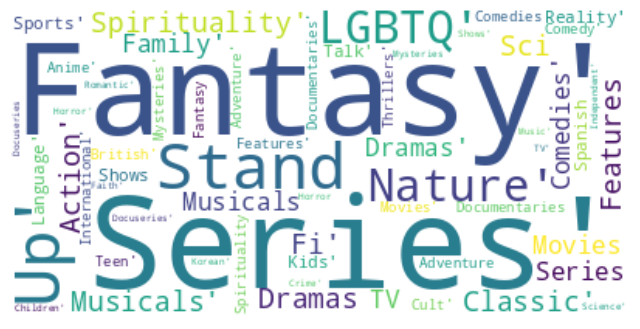

<Figure size 800x800 with 0 Axes>

In [239]:
#Word Cloud of Genre
from collections import Counter
genres=[]
genres=list(df1['genre'])
gen=[]
i =[]
text =[]
for i in genres:
    i=list(i.split(' '))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (8, 8)

#assigning shape to the word cloud

wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()
# adventure, fantasy, Fi

# .to_file('test.jpg')
plt.savefig("genre.png")
# wordcloud.save('test.png')

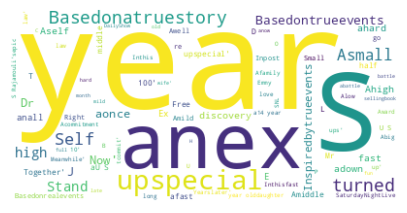

<Figure size 500x500 with 0 Axes>

In [240]:
#Word Cloud of description
from collections import Counter
genres=[]
genres=list(df1['description'])
gen=[]
i =[]
text =[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (5, 5)

#assigning shape to the word cloud

wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

plt.savefig("description.png")
# based on a true story & based on true events

## (2) type에 따라 분리
- TV show, movie

In [241]:
# movie 데이터 만들기
movie_df = df1[df1['type'] == 'Movie']
movie_df = movie_df.reset_index(drop=True)
movie_df

show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
1         s7  Movie  My Little Pony: A New Generation   
2         s8  Movie                           Sankofa   
3        s10  Movie                      The Starling   
4        s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
6126   s8802  Movie                           Zinzana   
6127   s8803  Movie                            Zodiac   
6128   s8805  Movie                        Zombieland   
6129   s8806  Movie                              Zoom   
6130   s8807  Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
1     Robert Cullen, José Luis Ucha   
2                      Haile Gerima   
3                    Theodore Melfi   
4               Christian Schwochow   
...                             ...   
6126                Majid Al Ansari   
6127                  David Fincher   
6128                Ruben Fleischer   
6129                   Peter Hewitt   
6130                    Mozez Singh   

                                                   cast          date_added  \
0                                               unknown  September 25, 2021   
1     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...  September 24, 2021   
2     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...  September 24, 2021   
3     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...  September 24, 2021   
4     Luna Wedler, Jannis Niewöhner, Milan Peschel, ...  September 23, 2021   
...                                                 ...                 ...   
6126  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...       March 9, 2016   
6127  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   November 20, 2019   
6128  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...    November 1, 2019   
6129  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...    January 11, 2020   
6130  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...       March 2, 2019   

      release_year rating duration  \
0             2020  PG-13   90 min   
1             2021     PG   91 min   
2             1993  TV-MA  125 min   
3             2021  PG-13  104 min   
4             2021  TV-MA  127 min   
...            ...    ...      ...   
6126          2015  TV-MA   96 min   
6127          2007      R  158 min   
6128          2009      R   88 min   
6129          2006     PG   88 min   
6130          2015  TV-14  111 min   

                                                 genre  \
0                                        Documentaries   
1                             Children & Family Movies   
2     Dramas, Independent Movies, International Movies   
3                                     Comedies, Dramas   
4                         Dramas, International Movies   
...                                                ...   
6126           Dramas, International Movies, Thrillers   
6127                    Cult Movies, Dramas, Thrillers   
6128                           Comedies, Horror Movies   
6129                Children & Family Movies, Comedies   
6130    Dramas, International Movies, Music & Musicals   

                                            description datetime_added  \
0     As her father nears the end of his life, filmm...     2021-09-25   
1     Equestria's divided. But a bright-eyed hero be...     2021-09-24   
2     On a photo shoot in Ghana, an American model s...     2021-09-24   
3     A woman adjusting to life after a loss contend...     2021-09-24   
4     After most of her family is murdered in a terr...     2021-09-23   
...                                                 ...            ...   
6126  Recovering alcoholic Talal wakes up inside a s...     2016-03-09   
6127  A political cartoonist, a crime reporter and a...     2019-11-20   
6128  Looking to survive in a world taken over by zo...     2019-11-01   
6129  Dr

In [242]:
# tv show 데이터 만들기
tv_df = df1[df1['type'] == 'TV Show']
tv_df = tv_df.reset_index(drop=True)
tv_df

show_id     type                  title         director  \
0         s2  TV Show          Blood & Water          unknown   
1         s3  TV Show              Ganglands  Julien Leclercq   
2         s4  TV Show  Jailbirds New Orleans          unknown   
3         s5  TV Show           Kota Factory          unknown   
4         s6  TV Show          Midnight Mass    Mike Flanagan   
...      ...      ...                    ...              ...   
2671   s8796  TV Show        Yu-Gi-Oh! Arc-V          unknown   
2672   s8797  TV Show             Yunus Emre          unknown   
2673   s8798  TV Show              Zak Storm          unknown   
2674   s8801  TV Show     Zindagi Gulzar Hai          unknown   
2675   s8804  TV Show            Zombie Dumb          unknown   

                                                   cast          date_added  \
0     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  September 24, 2021   
1     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  September 24, 2021   
2                                               unknown  September 24, 2021   
3     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...  September 24, 2021   
4     Kate Siegel, Zach Gilford, Hamish Linklater, H...  September 24, 2021   
...                                                 ...                 ...   
2671  Mike Liscio, Emily Bauer, Billy Bob Thompson, ...         May 1, 2018   
2672  Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...    January 17, 2017   
2673  Michael Johnston, Jessica Gee-George, Christin...  September 13, 2018   
2674  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...   December 15, 2016   
2675                                            unknown        July 1, 2019   

      release_year rating   duration  \
0             2021  TV-MA  2 Seasons   
1             2021  TV-MA   1 Season   
2             2021  TV-MA   1 Season   
3             2021  TV-MA  2 Seasons   
4             2021  TV-MA   1 Season   
...            ...    ...        ...   
2671          2015  TV-Y7  2 Seasons   
2672          2016  TV-PG  2 Seasons   
2673          2016  TV-Y7  3 Seasons   
2674          2012  TV-PG   1 Season   
2675          2018  TV-Y7  2 Seasons   

                                                  genre  \
0       International TV Shows, TV Dramas, TV Mysteries   
1     Crime TV Shows, International TV Shows, TV Act...   
2                                Docuseries, Reality TV   
3     International TV Shows, Romantic TV Shows, TV ...   
4                    TV Dramas, TV Horror, TV Mysteries   
...                                                 ...   
2671                             Anime Series, Kids' TV   
2672                  International TV Shows, TV Dramas   
2673                                           Kids' TV   
2674  International TV Shows, Romantic TV Shows, TV ...   
2675             Kids' TV, Korean TV Shows, TV Comedies   

                                            description datetime_added  \
0     After crossing paths at a party, a Cape Town t...     2021-09-24   
1     To protect his family from a powerful drug lor...     2021-09-24   
2     Feuds, flirtations and toilet talk go down amo...     2021-09-24   
3     In a city of coaching centers known to train I...     2021-09-24   
4     The arrival of a charismatic young priest brin...     2021-09-24   
...                                                 ...            ...   
2671  Now that he's discovered the Pendulum Summonin...     2018-05-01   
2672  During the Mongol invasions, Yunus Emre leaves...     2017-01-17   
2673  Teen surfer Zak Storm is mysteriously transpor...     2018-09-13   
2674  Strong-willed, middle-class Kashaf and carefre...     2016-12-15   
2675  While living alone in a spooky town, a young g...     2019-07-01   

     YearMonth_added year_added   made_country  
0         2021-09-01       2021   South Africa  
1         2021-09-01       2021   South Africa  
2         2021-09-01       2021   South Africa  


In [243]:
# movie 데이터 결측치 확인
movie_df.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
datetime_added     0
YearMonth_added    0
year_added         0
made_country       0
dtype: int64

In [244]:
tv_df.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
datetime_added     0
YearMonth_added    0
year_added         0
made_country       0
dtype: int64

In [245]:
df1

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          unknown   
4         s5  TV Show           Kota Factory          unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast          date_added  \
0                                               unknown  September 25, 2021   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  September 24, 2021   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  September 24, 2021   
3                                               unknown  September 24, 2021   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...  September 24, 2021   
...                                                 ...                 ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   November 20, 2019   
8803                                            unknown        July 1, 2019   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...    November 1, 2019   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...    January 11, 2020   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...       March 2, 2019   

      release_year rating   duration  \
0             2020  PG-13     90 min   
1             2021  TV-MA  2 Seasons   
2             2021  TV-MA   1 Season   
3             2021  TV-MA   1 Season   
4             2021  TV-MA  2 Seasons   
...            ...    ...        ...   
8802          2007      R    158 min   
8803          2018  TV-Y7  2 Seasons   
8804          2009      R     88 min   
8805          2006     PG     88 min   
8806          2015  TV-14    111 min   

                                                  genre  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description datetime_added  \
0     As her father nears the end of his life, filmm...     2021-09-25   
1     After crossing paths at a party, a Cape Town t...     2021-09-24   
2     To protect his family from a powerful drug lor...     2021-09-24   
3     Feuds, flirtations and toilet talk go down amo...     2021-09-24   
4     In a city of coaching centers known to train I...     2021-09-24   
...                                                 ...            ...   
8802  A political cartoonist, a crime reporter and a...     2019-11-20   
8803  While living alone in a spooky town, a young g...     2019-07-01   
8804  Looking to survive in a world taken over by zo...     2019-11-01   
8805  Dragged from civilian life, a former superhero...     2020-01-11   
8806  A scrappy but poor boy worms his way into a ty...     2019-03-02   

     YearMonth_added year_added   made_country  
0         2021-09-01       2021  United States  
1         2021-09-01       2021   South Africa  
2         2021-09-01       2021   South Africa  


###a. type을 one hot encoding 처리

In [246]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False) #array 형태로 받을 수 있음
cat = ohe.fit_transform(df1[['type']]) #데이터 프레임으로 해야 하므로 대괄호 2개

df_cat = pd.DataFrame(cat, columns = ohe.get_feature_names_out())
df_cat

type_Movie  type_TV Show
0            1.0           0.0
1            0.0           1.0
2            0.0           1.0
3            0.0           1.0
4            0.0           1.0
...          ...           ...
8802         1.0           0.0
8803         0.0           1.0
8804         1.0           0.0
8805         1.0           0.0
8806         1.0           0.0

[8807 rows x 2 columns]

In [247]:
df1

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          unknown   
4         s5  TV Show           Kota Factory          unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast          date_added  \
0                                               unknown  September 25, 2021   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  September 24, 2021   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  September 24, 2021   
3                                               unknown  September 24, 2021   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...  September 24, 2021   
...                                                 ...                 ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   November 20, 2019   
8803                                            unknown        July 1, 2019   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...    November 1, 2019   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...    January 11, 2020   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...       March 2, 2019   

      release_year rating   duration  \
0             2020  PG-13     90 min   
1             2021  TV-MA  2 Seasons   
2             2021  TV-MA   1 Season   
3             2021  TV-MA   1 Season   
4             2021  TV-MA  2 Seasons   
...            ...    ...        ...   
8802          2007      R    158 min   
8803          2018  TV-Y7  2 Seasons   
8804          2009      R     88 min   
8805          2006     PG     88 min   
8806          2015  TV-14    111 min   

                                                  genre  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description datetime_added  \
0     As her father nears the end of his life, filmm...     2021-09-25   
1     After crossing paths at a party, a Cape Town t...     2021-09-24   
2     To protect his family from a powerful drug lor...     2021-09-24   
3     Feuds, flirtations and toilet talk go down amo...     2021-09-24   
4     In a city of coaching centers known to train I...     2021-09-24   
...                                                 ...            ...   
8802  A political cartoonist, a crime reporter and a...     2019-11-20   
8803  While living alone in a spooky town, a young g...     2019-07-01   
8804  Looking to survive in a world taken over by zo...     2019-11-01   
8805  Dragged from civilian life, a former superhero...     2020-01-11   
8806  A scrappy but poor boy worms his way into a ty...     2019-03-02   

     YearMonth_added year_added   made_country  
0         2021-09-01       2021  United States  
1         2021-09-01       2021   South Africa  
2         2021-09-01       2021   South Africa  


In [248]:
df1 = pd.concat([df1,df_cat],axis = 1)
df1

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          unknown   
4         s5  TV Show           Kota Factory          unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast          date_added  \
0                                               unknown  September 25, 2021   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  September 24, 2021   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  September 24, 2021   
3                                               unknown  September 24, 2021   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...  September 24, 2021   
...                                                 ...                 ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   November 20, 2019   
8803                                            unknown        July 1, 2019   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...    November 1, 2019   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...    January 11, 2020   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...       March 2, 2019   

      release_year rating   duration  \
0             2020  PG-13     90 min   
1             2021  TV-MA  2 Seasons   
2             2021  TV-MA   1 Season   
3             2021  TV-MA   1 Season   
4             2021  TV-MA  2 Seasons   
...            ...    ...        ...   
8802          2007      R    158 min   
8803          2018  TV-Y7  2 Seasons   
8804          2009      R     88 min   
8805          2006     PG     88 min   
8806          2015  TV-14    111 min   

                                                  genre  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description datetime_added  \
0     As her father nears the end of his life, filmm...     2021-09-25   
1     After crossing paths at a party, a Cape Town t...     2021-09-24   
2     To protect his family from a powerful drug lor...     2021-09-24   
3     Feuds, flirtations and toilet talk go down amo...     2021-09-24   
4     In a city of coaching centers known to train I...     2021-09-24   
...                                                 ...            ...   
8802  A political cartoonist, a crime reporter and a...     2019-11-20   
8803  While living alone in a spooky town, a young g...     2019-07-01   
8804  Looking to survive in a world taken over by zo...     2019-11-01   
8805  Dragged from civilian life, a former superhero...     2020-01-11   
8806  A scrappy but poor boy worms his way into a ty...     2019-03-02   

     YearMonth_added year_added   made_country  type_Movie  type_TV Show  
0         2021-09-01       2021  United States         1.0           0.0  
1         2021-09-01       2021   South Africa

###b. type에 따른 컨텐츠 양 시각화

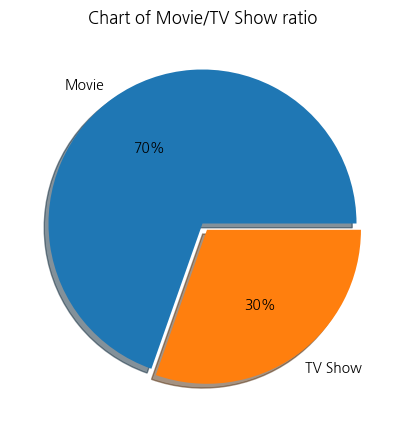

In [249]:
#type에 따라 컨텐츠 양 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
labels = df1['type'].value_counts().index.tolist()
ratio = df1['type'].value_counts().values.tolist()
explode = (0, 0.05) #조각이 갈라지는 것 표현 

plt.pie(ratio, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('Chart of Movie/TV Show ratio')
plt.show()

Text(0.5, 1.0, 'no of released contents')

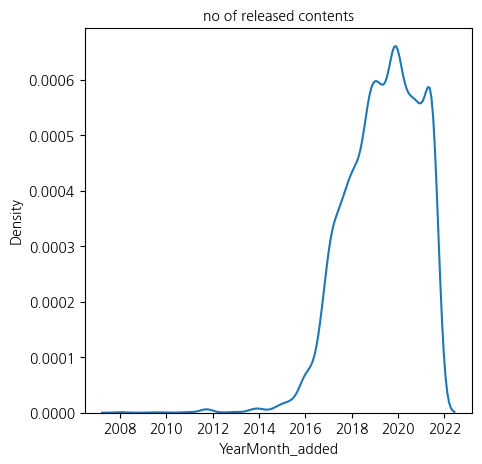

In [250]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5))

sns.kdeplot(data=df1['YearMonth_added'])
ax.set_title('no of released contents', fontsize=10)

###c. 컨텐츠 공개 시점에 따른 컨텐츠량 추이 시각화

In [251]:
#릴리즈 시점에 따른 movie,  tv show의 추이
df2 = df1['type_Movie'].groupby(df1['YearMonth_added']).sum()
df2 = pd.DataFrame(df2)
df2['type_TV Show'] = df1['type_TV Show'].groupby(df1['YearMonth_added']).sum()
df2

type_Movie  type_TV Show
YearMonth_added                          
2008-01-01              1.0           0.0
2008-02-01              0.0           1.0
2009-05-01              1.0           0.0
2009-11-01              1.0           0.0
2010-11-01              1.0           0.0
...                     ...           ...
2021-05-01             94.0          38.0
2021-06-01            124.0          83.0
2021-07-01            169.0          88.0
2021-08-01            117.0          61.0
2021-09-01            118.0          65.0

[109 rows x 2 columns]

In [252]:
df2['sum'] = df2['type_Movie'] + df2['type_TV Show']
df2

type_Movie  type_TV Show    sum
YearMonth_added                                 
2008-01-01              1.0           0.0    1.0
2008-02-01              0.0           1.0    1.0
2009-05-01              1.0           0.0    1.0
2009-11-01              1.0           0.0    1.0
2010-11-01              1.0           0.0    1.0
...                     ...           ...    ...
2021-05-01             94.0          38.0  132.0
2021-06-01            124.0          83.0  207.0
2021-07-01            169.0          88.0  257.0
2021-08-01            117.0          61.0  178.0
2021-09-01            118.0          65.0  183.0

[109 rows x 3 columns]

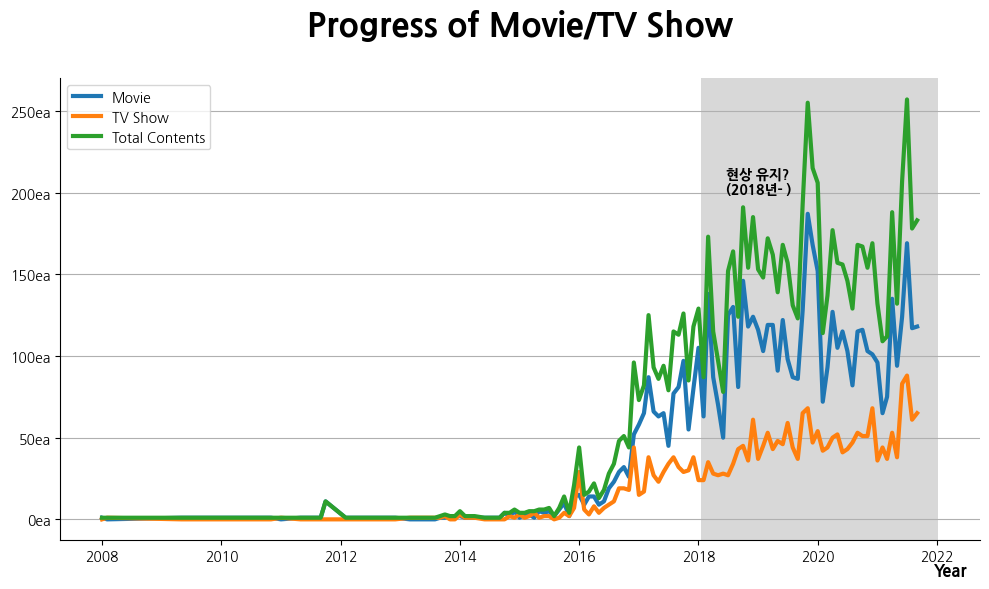

In [253]:
from matplotlib import cm

fig, ax= plt.subplots(figsize=(10, 6), facecolor="w")

# spines 정리
for s in ["right", "top"]:
    ax.spines[s].set_visible(False)

    
ax.plot(df2.index, df2['type_Movie'], lw=3)
ax.plot(df2.index, df2['type_TV Show'], lw=3)
ax.plot(df2.index, df2['sum'], lw=3)

ax.grid(axis="y")

yticks = list(np.arange(-50, 300, 50))
ax.text(0.95, -0.075, "Year", transform=ax.transAxes, fontsize=12, fontweight="bold")
ax.set_yticklabels([f"{int(y)}ea" if y > 0 else "0ea" for y in yticks])

ax.legend(['Movie', 'TV Show', 'Total Contents'])
ax.set_title('Progress of Movie/TV Show',  fontsize=24, fontweight="bold", pad=32)

# 박스권 추가
ax.axvspan(17550, 19000, fc="gray", alpha=0.3)
ax.text(17700, 200, "현상 유지?\n(2018년- )", color="k", fontweight="bold")

fig.tight_layout()
plt.show()

월 기준 컨텐츠 공개양의 시각화는 어떤 경향을 보기에 혼돈스러운 부분이 있음.  
그래서 기준을 1년으로 바꾸어 보자.

In [254]:
df1

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          unknown   
4         s5  TV Show           Kota Factory          unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast          date_added  \
0                                               unknown  September 25, 2021   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  September 24, 2021   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  September 24, 2021   
3                                               unknown  September 24, 2021   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...  September 24, 2021   
...                                                 ...                 ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   November 20, 2019   
8803                                            unknown        July 1, 2019   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...    November 1, 2019   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...    January 11, 2020   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...       March 2, 2019   

      release_year rating   duration  \
0             2020  PG-13     90 min   
1             2021  TV-MA  2 Seasons   
2             2021  TV-MA   1 Season   
3             2021  TV-MA   1 Season   
4             2021  TV-MA  2 Seasons   
...            ...    ...        ...   
8802          2007      R    158 min   
8803          2018  TV-Y7  2 Seasons   
8804          2009      R     88 min   
8805          2006     PG     88 min   
8806          2015  TV-14    111 min   

                                                  genre  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description datetime_added  \
0     As her father nears the end of his life, filmm...     2021-09-25   
1     After crossing paths at a party, a Cape Town t...     2021-09-24   
2     To protect his family from a powerful drug lor...     2021-09-24   
3     Feuds, flirtations and toilet talk go down amo...     2021-09-24   
4     In a city of coaching centers known to train I...     2021-09-24   
...                                                 ...            ...   
8802  A political cartoonist, a crime reporter and a...     2019-11-20   
8803  While living alone in a spooky town, a young g...     2019-07-01   
8804  Looking to survive in a world taken over by zo...     2019-11-01   
8805  Dragged from civilian life, a former superhero...     2020-01-11   
8806  A scrappy but poor boy worms his way into a ty...     2019-03-02   

     YearMonth_added year_added   made_country  type_Movie  type_TV Show  
0         2021-09-01       2021  United States         1.0           0.0  
1         2021-09-01       2021   South Africa

In [255]:
#릴리즈 시점에 따른 movie,  tv show의 추이
df4 = {}
df4 = df1['type_Movie'].groupby(df1['year_added']).sum()
df4 = pd.DataFrame(df4)
df4['type_TV Show'] = df1['type_TV Show'].groupby(df1['year_added']).sum()
df4


type_Movie  type_TV Show
year_added                          
2008               1.0           1.0
2009               2.0           0.0
2010               1.0           0.0
2011              13.0           1.0
2012               3.0           0.0
2013               6.0           5.0
2014              19.0           8.0
2015              56.0          29.0
2016             253.0         177.0
2017             839.0         350.0
2018            1237.0         412.0
2019            1424.0         592.0
2020            1284.0         596.0
2021             993.0         505.0

In [256]:
df4['sum'] = df4['type_Movie'] + df4['type_TV Show']
df4 = df4.reset_index()
# df4['year_added'] = df4['year_added'].astype(object)
df4['year_added'] = pd.to_datetime(df4['year_added'])
df4

year_added  type_Movie  type_TV Show     sum
0  2008-01-01         1.0           1.0     2.0
1  2009-01-01         2.0           0.0     2.0
2  2010-01-01         1.0           0.0     1.0
3  2011-01-01        13.0           1.0    14.0
4  2012-01-01         3.0           0.0     3.0
5  2013-01-01         6.0           5.0    11.0
6  2014-01-01        19.0           8.0    27.0
7  2015-01-01        56.0          29.0    85.0
8  2016-01-01       253.0         177.0   430.0
9  2017-01-01       839.0         350.0  1189.0
10 2018-01-01      1237.0         412.0  1649.0
11 2019-01-01      1424.0         592.0  2016.0
12 2020-01-01      1284.0         596.0  1880.0
13 2021-01-01       993.0         505.0  1498.0

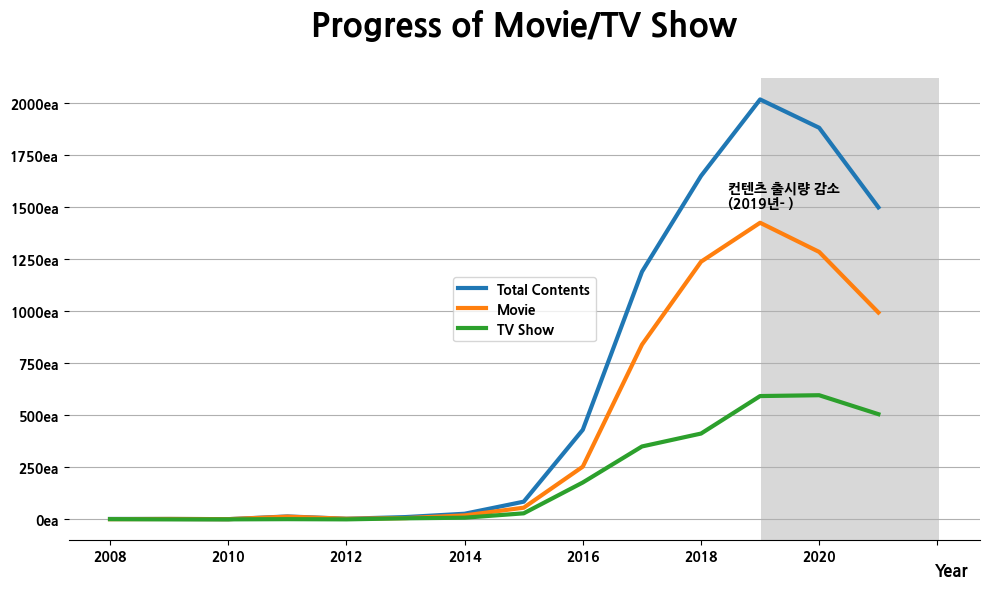

In [257]:
from matplotlib import cm

fig, ax= plt.subplots(figsize=(10, 6), facecolor="w")

# spines 정리
for s in ["right", "top", "left"]:
    ax.spines[s].set_visible(False)

ax.plot(df4['year_added'], df4['sum'], lw=3)    
ax.plot(df4['year_added'], df4['type_Movie'], lw=3)
ax.plot(df4['year_added'], df4['type_TV Show'], lw=3)


ax.grid(axis="y")

xticks = list(np.arange(2006, 2022, 2))
yticks = list(np.arange(-250, 2250, 250))
ax.text(0.95, -0.075, "Year", transform=ax.transAxes, fontsize=12, fontweight="bold")
ax.set_xticklabels([f"{int(y)}" if y > 0 else "0" for y in xticks], fontweight="bold")
ax.set_yticklabels([f"{int(y)}ea" if y > 0 else "0ea" for y in yticks], fontweight="bold")


ax.legend(['Total Contents', 'Movie', 'TV Show'], loc='center', prop=dict(weight='bold'))
ax.set_title('Progress of Movie/TV Show',  fontsize=24, fontweight="bold", pad=32)

# 박스권 추가
ax.axvspan(17900, 19000, fc="gray", alpha=0.3)
ax.text(17700, 1500, "컨텐츠 출시량 감소\n(2019년- )", color="k", fontweight="bold")

fig.tight_layout()
plt.show()

###d. 컨텐츠 공개량과 주가의 관계 시각화 

In [258]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [259]:
import os

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams

import yfinance as yf

In [260]:
nf1 = yf.download('NFLX',start = '2007-01-01')
nf1

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2007-01-03    3.714286    3.824286    3.677143    3.801429    3.801429   
2007-01-04    3.772857    3.828571    3.585714    3.621429    3.621429   
2007-01-05    3.620000    3.620000    3.492857    3.544286    3.544286   
2007-01-08    3.545714    3.555714    3.367143    3.404286    3.404286   
2007-01-09    3.427143    3.440000    3.360000    3.427143    3.427143   
...                ...         ...         ...         ...         ...   
2023-04-20  320.390015  331.429993  318.329987  325.350006  325.350006   
2023-04-21  323.000000  328.290009  319.500000  327.980011  327.980011   
2023-04-24  330.200012  334.660004  326.750000  329.019989  329.019989   
2023-04-25  328.500000  328.660004  321.100006  322.549988  322.549988   
2023-04-26  321.359985  325.899994  320.470001  321.149994  321.149994   

              Volume  
Date                  
2007-01-03  16440900  
2007-01-04  15959300  
2007-01-05  15190700  
2007-01-08  18344900  
2007-01-09  10611300  
...              ...  
2023-04-20   9947800  
2023-04-21   6342600  
2023-04-24   5586600  
2023-04-25   5426600  
2023-04-26   4618800  

[4107 rows x 6 columns]

In [261]:
nf2 = nf1['Close']
nf2 = pd.DataFrame(nf2)
nf2.head()

Close
Date                
2007-01-03  3.801429
2007-01-04  3.621429
2007-01-05  3.544286
2007-01-08  3.404286
2007-01-09  3.427143

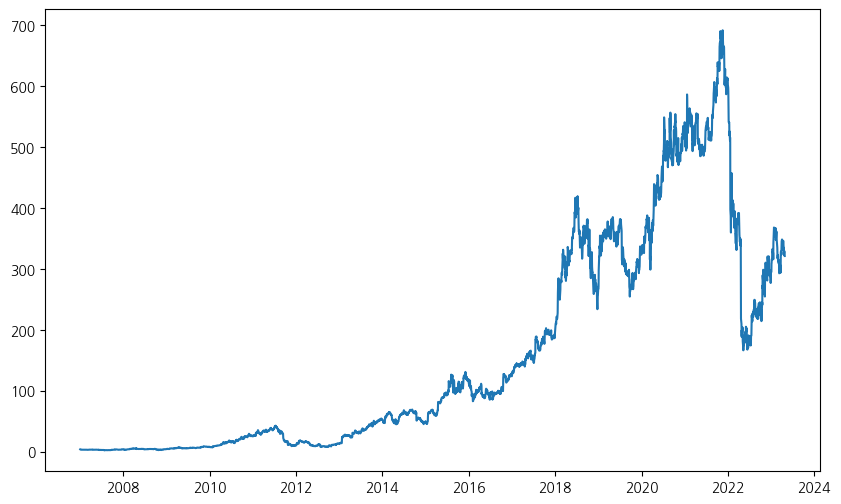

In [262]:
fig= plt.subplots(figsize=(10, 6), facecolor="w")
plt.plot(nf2)

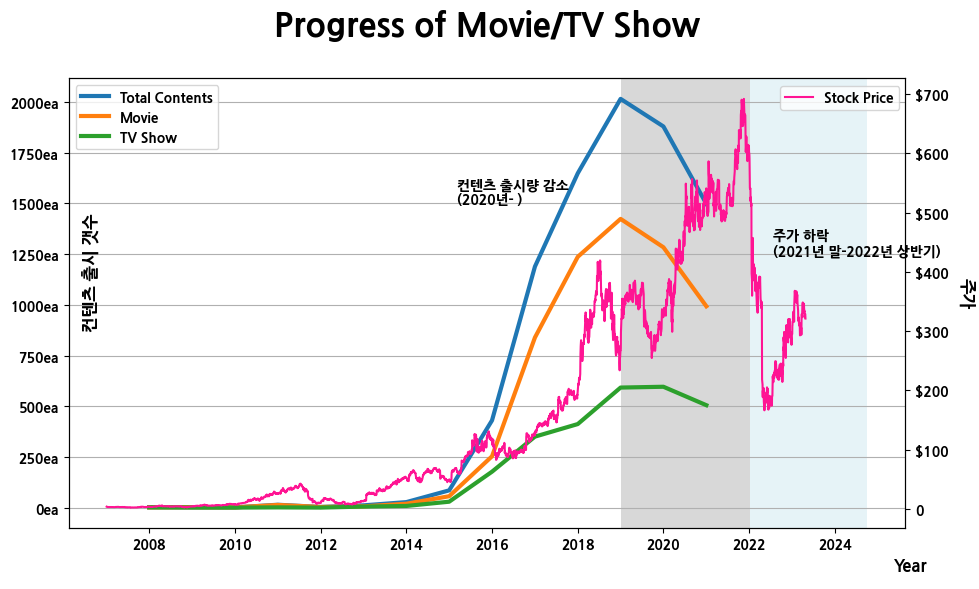

In [263]:
from matplotlib import cm

# axes 추가
# ax_sn = ax.twinx()

fig, ax1= plt.subplots(figsize=(10, 6), facecolor="w")

# spines 정리
for s in ["right", "top", "left"]:
    ax.spines[s].set_visible(False)

#넷플릭스 컨텐츠량
ax1.plot(df4['year_added'], df4['sum'], lw=3)    
ax1.plot(df4['year_added'], df4['type_Movie'], lw=3)
ax1.plot(df4['year_added'], df4['type_TV Show'], lw=3)

# # axes 추가
ax2 = ax1.twinx()
# ax2 = ax1.twiny()

#넷플릭스 주가
ax2.plot(nf2.index, nf2['Close'],color='deeppink')

ax1.grid(axis="y")

#축 설정
xticks = list(np.arange(2006, 2026, 2))
yticks = list(np.arange(-250, 2250, 250))
y2ticks = list(np.arange(-100, 800, 100))
ax1.text(0.01, 0.45, "컨텐츠 출시 갯수", transform=ax.transAxes, fontsize=12, fontweight="bold", rotation =90)
ax1.text(0.97, 0.5, "주가", transform=ax.transAxes, fontsize=12, fontweight="bold", rotation =270)
ax1.text(0.9, -0.075, "Year", transform=ax.transAxes, fontsize=12, fontweight="bold")
ax1.set_xticklabels([f"{int(y)}" if y > 0 else "0" for y in xticks], fontweight="bold")
ax1.set_yticklabels([f"{int(y)}ea" if y > 0 else "0ea" for y in yticks], fontweight="bold")
ax2.set_yticklabels([f"${int(y)}" if y > 0 else "0" for y in y2ticks], fontweight="bold")

#범례 및 타이틀
ax1.legend(['Total Contents', 'Movie', 'TV Show'], loc='best', prop=dict(weight='bold'))
ax2.legend(['Stock Price'], loc=(0.85, 0.93), prop=dict(weight='bold'))
ax1.set_title('Progress of Movie/TV Show',  fontsize=24, fontweight="bold", pad=32)

# 박스권 추가
ax1.axvspan(17900, 19000, fc="gray", alpha=0.3)
ax1.axvspan(19000, 20000, fc="lightblue", alpha=0.3)
ax1.text(16500, 1500, "컨텐츠 출시량 감소\n(2020년- )", color="k", fontweight="bold")
ax1.text(19200, 1250, "주가 하락\n(2021년 말-2022년 상반기)", color="k", fontweight="bold")

fig.tight_layout()
plt.show()

- 구독자가 볼 수 있는 새로운 컨텐츠가 부족해지면서 구독자 수는 감소할 것이고 주가 하락으로 이어졌다고 예상할 수 있음. 
- 그러나 컨텐츠의 감소가 내부적 요인인 아닌 외부적 요인이라는 전제로 분석을 진행하였다.
  다음 설명을 통해 가설을 설명해 보겠다..

###e. 디즈니 플러스와 비교

In [264]:
#laod data
path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL/'
df_d = pd.read_csv(path+'disney_plus_titles.csv')

In [265]:
# diseny 데이터
df_d = df_d.dropna(subset=['date_added']).reset_index(drop=True) # 결측치 제거

df_d['date'] = pd.to_datetime(df_d["date_added"])
df_d['up_date'] = df_d['date'].apply(lambda x: int(x.strftime('%Y%m%d'))) 
df_d['year'] = df_d['date'].apply(lambda x: int(x.strftime('%Y')))
#df_d = df_d.drop("date_added", axis=1)
#df_d = df_d.drop("date", axis=1)
df_d.head()

show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough, Alexa...            NaN   
4  John Lennon, Paul McCartney, George Harrison, ...            NaN   

          date_added  release_year rating  duration  \
0  November 26, 2021          2016   TV-G    23 min   
1  November 26, 2021          1988     PG    91 min   
2  November 26, 2021          2011   TV-G    23 min   
3  November 26, 2021          2021  TV-PG    41 min   
4  November 25, 2021          2021    NaN  1 Season   

                       listed_in  \
0              Animation, Family   
1                         Comedy   
2      Animation, Comedy, Family   
3                        Musical   
4  Docuseries, Historical, Music   

                                         description       date   up_date  \
0   Join Mickey and the gang as they duck the halls! 2021-11-26  20211126   
1  Santa Claus passes his magic bag to a new St. ... 2021-11-26  20211126   
2          Sid the Sloth is on Santa's naughty list. 2021-11-26  20211126   
3               This is real life, not just fantasy! 2021-11-26  20211126   
4  A three-part documentary from Peter Jackson ca... 2021-11-25  20211125   

   year  
0  2021  
1  2021  
2  2021  
3  2021  
4  2021

In [266]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False) #array 형태로 받을 수 있음
cat_d = ohe.fit_transform(df_d[['type']]) #데이터 프레임으로 해야 하므로 대괄호 2개

df_cat_d = pd.DataFrame(cat_d, columns = ohe.get_feature_names_out())
df_cat_d

type_Movie  type_TV Show
0            1.0           0.0
1            1.0           0.0
2            1.0           0.0
3            1.0           0.0
4            0.0           1.0
...          ...           ...
1442         1.0           0.0
1443         1.0           0.0
1444         1.0           0.0
1445         1.0           0.0
1446         1.0           0.0

[1447 rows x 2 columns]

In [267]:
df_d = pd.concat([df_d, df_cat_d], axis = 1)
df_d.head()

show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough, Alexa...            NaN   
4  John Lennon, Paul McCartney, George Harrison, ...            NaN   

          date_added  release_year rating  duration  \
0  November 26, 2021          2016   TV-G    23 min   
1  November 26, 2021          1988     PG    91 min   
2  November 26, 2021          2011   TV-G    23 min   
3  November 26, 2021          2021  TV-PG    41 min   
4  November 25, 2021          2021    NaN  1 Season   

                       listed_in  \
0              Animation, Family   
1                         Comedy   
2      Animation, Comedy, Family   
3                        Musical   
4  Docuseries, Historical, Music   

                                         description       date   up_date  \
0   Join Mickey and the gang as they duck the halls! 2021-11-26  20211126   
1  Santa Claus passes his magic bag to a new St. ... 2021-11-26  20211126   
2          Sid the Sloth is on Santa's naughty list. 2021-11-26  20211126   
3               This is real life, not just fantasy! 2021-11-26  20211126   
4  A three-part documentary from Peter Jackson ca... 2021-11-25  20211125   

   year  type_Movie  type_TV Show  
0  2021         1.0           0.0  
1  2021         1.0           0.0  
2  2021         1.0           0.0  
3  2021         1.0           0.0  
4  2021         0.0           1.0

In [268]:
#릴리즈 시점에 따른 movie,  tv show의 추이
df_d2 = df_d['type_Movie'].groupby(df_d['year']).sum()
df_d2 = pd.DataFrame(df_d2)
df_d2['type_TV Show'] = df_d['type_TV Show'].groupby(df_d['year']).sum()

df_d2['sum'] = df_d2['type_Movie'] + df_d2['type_TV Show']
df_d2

type_Movie  type_TV Show    sum
year                                 
2019       630.0         135.0  765.0
2020       230.0         122.0  352.0
2021       192.0         138.0  330.0

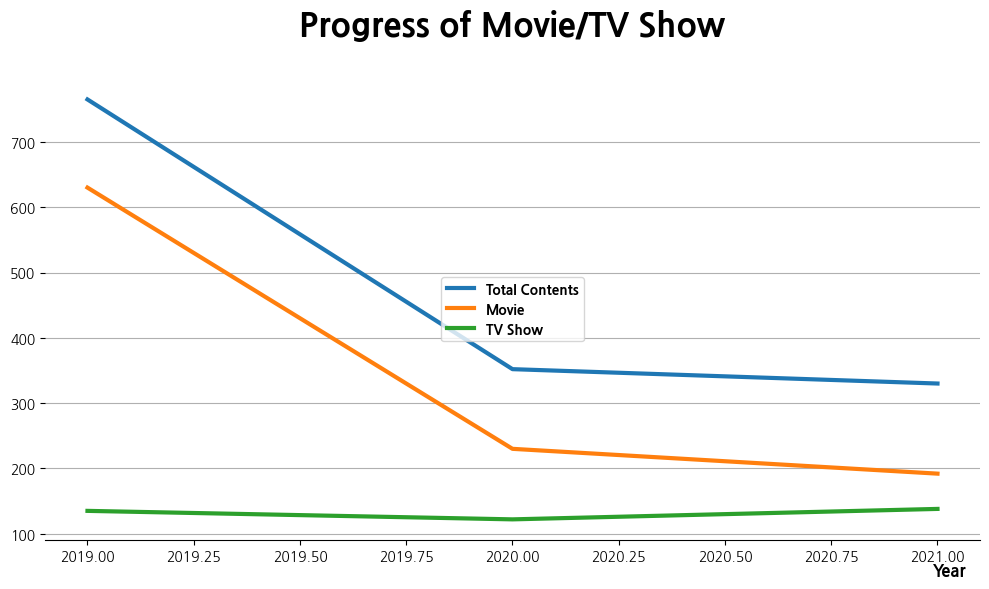

In [269]:
from matplotlib import cm

fig, ax= plt.subplots(figsize=(10, 6), facecolor="w")

# spines 정리
for s in ["right", "top", "left"]:
    ax.spines[s].set_visible(False)

ax.plot(df_d2.index, df_d2['sum'], lw=3)
ax.plot(df_d2.index, df_d2['type_Movie'], lw=3)
ax.plot(df_d2.index, df_d2['type_TV Show'], lw=3)


ax.grid(axis="y")

xticks = list(np.arange(2018, 2022, 1))
yticks = list(np.arange(-250, 2250, 250))
ax.text(0.95, -0.075, "Year", transform=ax.transAxes, fontsize=12, fontweight="bold")
#ax.set_xticklabels([f"{int(y)}" if y > 0 else "0" for y in xticks], fontweight="bold")
#ax.set_yticklabels([f"{int(y)}ea" if y > 0 else "0ea" for y in yticks], fontweight="bold")


ax.legend(['Total Contents', 'Movie', 'TV Show'], loc='center', prop=dict(weight='bold'))
ax.set_title('Progress of Movie/TV Show',  fontsize=24, fontweight="bold", pad=32)

# 박스권 추가
#ax.axvspan(17900, 19000, fc="gray", alpha=0.3)
#ax.text(17700, 1250, "컨텐츠 출시량 감소\n(2020년- )", color="k", fontweight="bold")

fig.tight_layout()
plt.show()

- 참고
- [구글 트렌드 넷플릭스& 디즈니](https://trends.google.co.kr/trends/explore?date=all&geo=KR&q=%EB%84%B7%ED%94%8C%EB%A6%AD%EC%8A%A4,%EB%94%94%EC%A6%88%EB%8B%88&hl=ko)

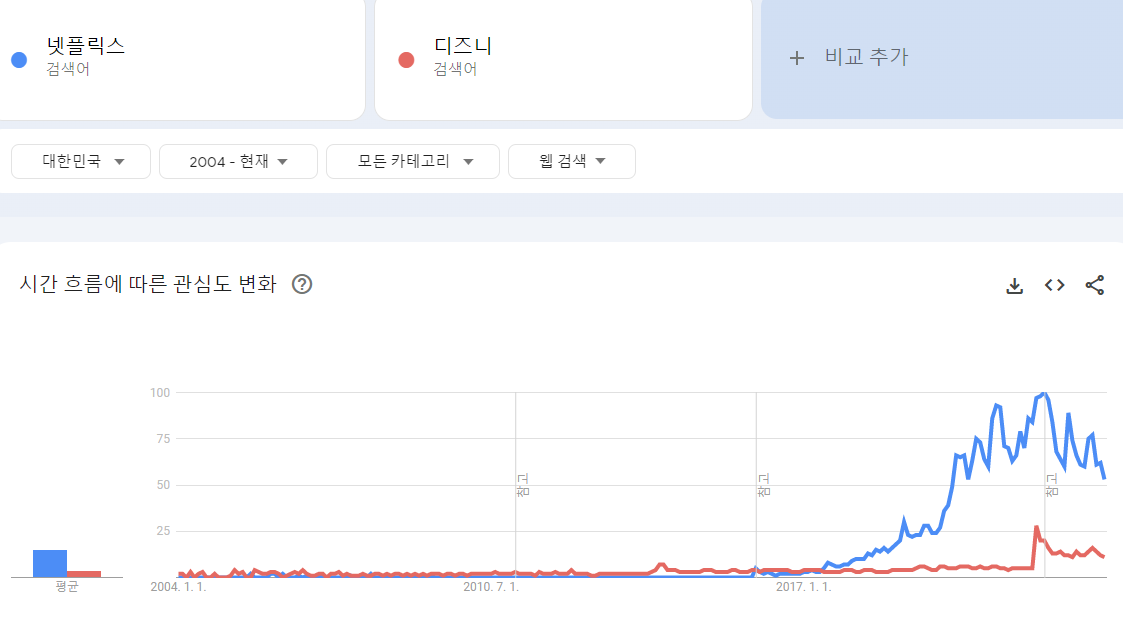


   - [기사](https://www.bbc.com/korean/international-61172759)

   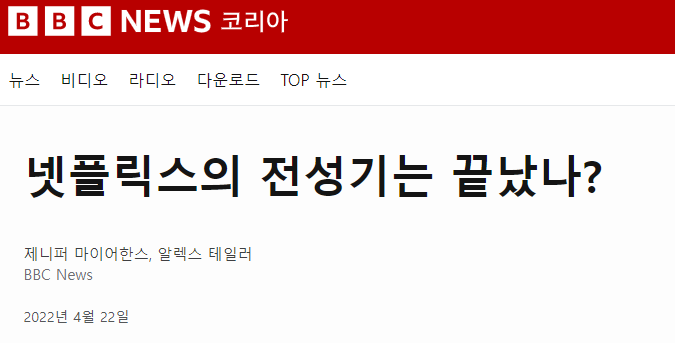

##(3) 연도별 데이터 분석
- 연도별 컨텐츠 장르 및 내용의 트렌드를 알기 위해 year_added 기준 5개 파트로 데이터를 분리하여 연도별 키워드를 알아보자


###a. 연도별 데이터 분리
- ~2017, 2018, 2019, 2020, 2021

In [270]:
tv_df['year_added'] = tv_df['year_added'].astype(int)
tv_df.head()

show_id     type                  title         director  \
0      s2  TV Show          Blood & Water          unknown   
1      s3  TV Show              Ganglands  Julien Leclercq   
2      s4  TV Show  Jailbirds New Orleans          unknown   
3      s5  TV Show           Kota Factory          unknown   
4      s6  TV Show          Midnight Mass    Mike Flanagan   

                                                cast          date_added  \
0  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  September 24, 2021   
1  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  September 24, 2021   
2                                            unknown  September 24, 2021   
3  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...  September 24, 2021   
4  Kate Siegel, Zach Gilford, Hamish Linklater, H...  September 24, 2021   

   release_year rating   duration  \
0          2021  TV-MA  2 Seasons   
1          2021  TV-MA   1 Season   
2          2021  TV-MA   1 Season   
3          2021  TV-MA  2 Seasons   
4          2021  TV-MA   1 Season   

                                               genre  \
0    International TV Shows, TV Dramas, TV Mysteries   
1  Crime TV Shows, International TV Shows, TV Act...   
2                             Docuseries, Reality TV   
3  International TV Shows, Romantic TV Shows, TV ...   
4                 TV Dramas, TV Horror, TV Mysteries   

                                         description datetime_added  \
0  After crossing paths at a party, a Cape Town t...     2021-09-24   
1  To protect his family from a powerful drug lor...     2021-09-24   
2  Feuds, flirtations and toilet talk go down amo...     2021-09-24   
3  In a city of coaching centers known to train I...     2021-09-24   
4  The arrival of a charismatic young priest brin...     2021-09-24   

  YearMonth_added  year_added  made_country  
0      2021-09-01        2021  South Africa  
1      2021-09-01        2021  South Africa  
2      2021-09-01        2021  South Africa  
3      2021-09-01        2021         India  
4      2021-09-01        2021         India

In [271]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          2676 non-null   object        
 1   type             2676 non-null   object        
 2   title            2676 non-null   object        
 3   director         2676 non-null   object        
 4   cast             2676 non-null   object        
 5   date_added       2676 non-null   object        
 6   release_year     2676 non-null   int64         
 7   rating           2676 non-null   object        
 8   duration         2676 non-null   object        
 9   genre            2676 non-null   object        
 10  description      2676 non-null   object        
 11  datetime_added   2676 non-null   datetime64[ns]
 12  YearMonth_added  2676 non-null   datetime64[ns]
 13  year_added       2676 non-null   int64         
 14  made_country     2676 non-null   object 

In [272]:
tv_df['year_added'].value_counts()

2020    596
2019    592
2021    505
2018    412
2017    350
2016    177
2015     29
2014      8
2013      5
2008      1
2011      1
Name: year_added, dtype: int64

In [273]:
print(tv_df[(tv_df['year_added']==2008)])

     show_id     type            title director     cast        date_added  \
2222   s6612  TV Show  Dinner for Five  unknown  unknown  February 4, 2008   

      release_year rating  duration                         genre  \
2222          2007  TV-MA  1 Season  Stand-Up Comedy & Talk Shows   

                                            description datetime_added  \
2222  In each episode, four celebrities join host Jo...     2008-02-04   

     YearMonth_added  year_added   made_country  
2222      2008-02-01        2008  United States  


In [274]:
# ~2017 데이터
tv_df2017 = tv_df[(tv_df['year_added']==2008) | (tv_df['year_added']==2013) | (tv_df['year_added']==2014) | (tv_df['year_added']==2015) | (tv_df['year_added']==2016) | (tv_df['year_added']==2017)]
tv_df2017 = tv_df2017.reset_index(drop=True)

# 2018
tv_df2018 = tv_df[tv_df['year_added']==2018]
tv_df2018 = tv_df2018.reset_index(drop=True)

# 2019
tv_df2019 = tv_df[tv_df['year_added']==2019]
tv_df2019 = tv_df2019.reset_index(drop=True)

# 2020
tv_df2020 = tv_df[tv_df['year_added']==2020]
tv_df2020 = tv_df2020.reset_index(drop=True)

# 2021
tv_df2021 = tv_df[tv_df['year_added']==2021]
tv_df2021 = tv_df2021.reset_index(drop=True)

tv_df2017.head()

show_id     type                                             title  \
0   s5101  TV Show  Dave Chappelle: Equanimity & The Bird Revelation   
1   s5104  TV Show                                          La Mante   
2   s5106  TV Show                                              Wadi   
3   s5110  TV Show                                    Part-Time Idol   
4   s5112  TV Show                                  Myths & Monsters   

        director                                               cast  \
0    Stan Lathan                                     Dave Chappelle   
1        unknown  Carole Bouquet, Fred Testot, Pascal Demolon, M...   
2        unknown  Syafie Naswip, Ardell Aryana, Naim Daniel, Sha...   
3        unknown  Hee-jeong Kim, Seung-un Hwang, Soo-hyun Lee, H...   
4  Daniel Kontur                                       Nicholas Day   

          date_added  release_year rating  duration  \
0  December 31, 2017          2017  TV-MA  1 Season   
1  December 29, 2017          2017  TV-MA  1 Season   
2  December 29, 2017          2015  TV-14  1 Season   
3  December 25, 2017          2017  TV-14  1 Season   
4  December 23, 2017          2017  TV-PG  1 Season   

                                               genre  \
0          Stand-Up Comedy & Talk Shows, TV Comedies   
1  Crime TV Shows, International TV Shows, TV Dramas   
2                  International TV Shows, TV Dramas   
3  International TV Shows, Korean TV Shows, TV Co...   
4                       British TV Shows, Docuseries   

                                         description datetime_added  \
0  Comedy titan Dave Chappelle caps a wild year w...     2017-12-31   
1  Decades after her capture, a serial killer off...     2017-12-29   
2  After the death of his father, a passive and g...     2017-12-29   
3  After taking a break from the business, a musi...     2017-12-25   
4  This documentary series takes us to the mythic...     2017-12-23   

  YearMonth_added  year_added    made_country  
0      2017-12-01        2017   United States  
1      2017-12-01        2017          France  
2      2017-12-01        2017          France  
3      2017-12-01        2017   United States  
4      2017-12-01        2017  United Kingdom

In [275]:
tv_df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          505 non-null    object        
 1   type             505 non-null    object        
 2   title            505 non-null    object        
 3   director         505 non-null    object        
 4   cast             505 non-null    object        
 5   date_added       505 non-null    object        
 6   release_year     505 non-null    int64         
 7   rating           505 non-null    object        
 8   duration         505 non-null    object        
 9   genre            505 non-null    object        
 10  description      505 non-null    object        
 11  datetime_added   505 non-null    datetime64[ns]
 12  YearMonth_added  505 non-null    datetime64[ns]
 13  year_added       505 non-null    int64         
 14  made_country     505 non-null    object   

In [276]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6131 entries, 0 to 6130
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          6131 non-null   object        
 1   type             6131 non-null   object        
 2   title            6131 non-null   object        
 3   director         6131 non-null   object        
 4   cast             6131 non-null   object        
 5   date_added       6131 non-null   object        
 6   release_year     6131 non-null   int64         
 7   rating           6131 non-null   object        
 8   duration         6131 non-null   object        
 9   genre            6131 non-null   object        
 10  description      6131 non-null   object        
 11  datetime_added   6131 non-null   datetime64[ns]
 12  YearMonth_added  6131 non-null   datetime64[ns]
 13  year_added       6131 non-null   object        
 14  made_country     6131 non-null   object 

In [277]:
movie_df['year_added'] = movie_df['year_added'].astype(int)

In [278]:
#Movie
# ~2017 데이터
movie_df2017 = movie_df[(movie_df['year_added']==2008)| (movie_df['year_added']==2009)| (movie_df['year_added']==2010)| (movie_df['year_added']==2011) | (movie_df['year_added']==2012)| (movie_df['year_added']==2013) | (movie_df['year_added']==2014) | (movie_df['year_added']==2015) | (movie_df['year_added']==2016)| (movie_df['year_added']==2017)]
movie_df2017 = movie_df2017.reset_index(drop=True)

# 2018
movie_df2018 = movie_df[movie_df['year_added']==2018]
movie_df2018 = movie_df2018.reset_index(drop=True)

# 2019
movie_df2019 = movie_df[movie_df['year_added']==2019]
movie_df2019 = movie_df2019.reset_index(drop=True)

# 2020
movie_df2020 = movie_df[(movie_df['year_added']==2020)]
movie_df2020 = movie_df2020.reset_index(drop=True)

# 2021
movie_df2021= movie_df[movie_df['year_added']==2021]
movie_df2021 = movie_df2021.reset_index(drop=True)

In [279]:
movie_df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          1193 non-null   object        
 1   type             1193 non-null   object        
 2   title            1193 non-null   object        
 3   director         1193 non-null   object        
 4   cast             1193 non-null   object        
 5   date_added       1193 non-null   object        
 6   release_year     1193 non-null   int64         
 7   rating           1193 non-null   object        
 8   duration         1193 non-null   object        
 9   genre            1193 non-null   object        
 10  description      1193 non-null   object        
 11  datetime_added   1193 non-null   datetime64[ns]
 12  YearMonth_added  1193 non-null   datetime64[ns]
 13  year_added       1193 non-null   int64         
 14  made_country     1193 non-null   object 

###b. Word Cloud for genre, description of TV Show

In [280]:
# wordcloud 함수

from matplotlib.figure import figaspect
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

def wordCloud(x,y):
    genres =[]
    gen=[]
    i=[]
    text=[]
    g=[]
    
    genres=list(x)

    for i in genres:
        i=list(i.split(' '))
        for j in i:
            gen.append(j.replace(' ',""))
    g=Counter(gen)

    text = list(set(gen))
    plt.rcParams['figure.figsize'] = (8, 8)

    #assigning shape to the word cloud

    wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    # plt.show()
    plt.savefig(path + y +'.png', facecolor='#eeeeee')


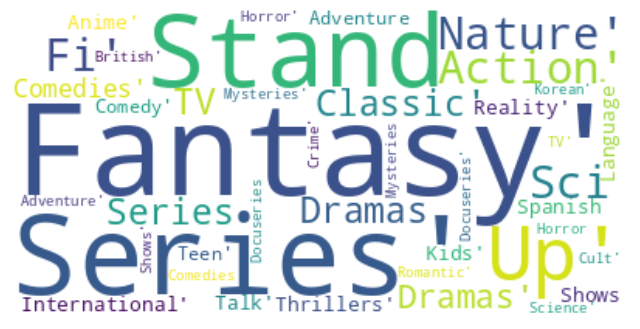

In [281]:
wordCloud(tv_df2017['genre'],'tv_df2017_genre')
wordCloud(tv_df2018['genre'],'tv_df2018_genre')
wordCloud(tv_df2019['genre'],'tv_df2019_genre')
wordCloud(tv_df2020['genre'],'tv_df2020_genre')
wordCloud(tv_df2021['genre'],'tv_df2021_genre')

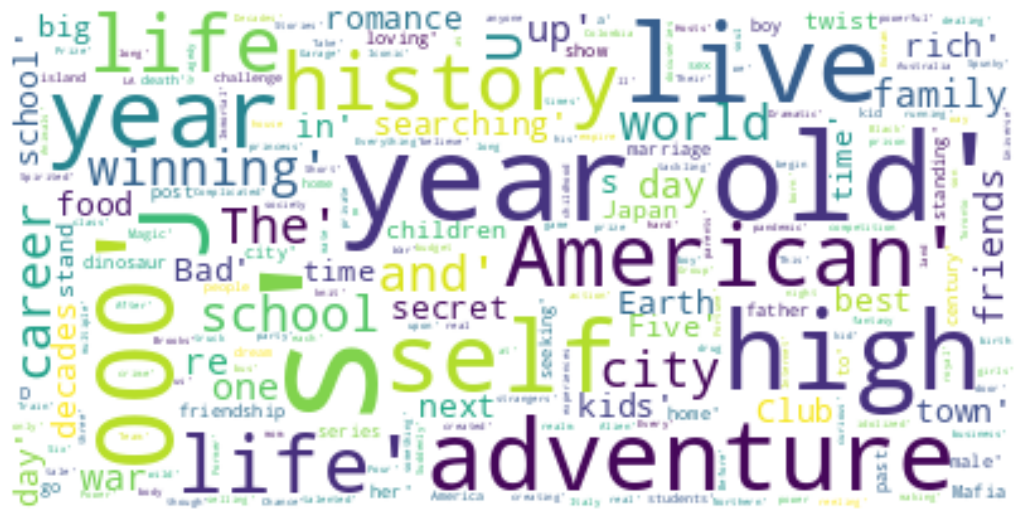

In [282]:
# wordcloud for description 함수

from matplotlib.figure import figaspect
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

def wordCloudd(x,y):
    genres =[]
    gen=[]
    i=[]
    text=[]
    g=[]
    genres=list(x)
    
    for i in genres:
        i=list(i.split(' '))
        for j in i:
            gen.append(j.replace(' ',""))
    g=Counter(gen)

    text = list(set(gen))
    plt.rcParams['figure.figsize'] = (13, 13)

    #assigning shape to the word cloud

    wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    # plt.show()
    plt.savefig(path + y +'.png', facecolor='#eeeeee')


wordCloudd(tv_df2017['description'],'tv_df2017_description')
wordCloudd(tv_df2018['description'],'tv_df2018_description')
wordCloudd(tv_df2019['description'],'tv_df2019_description')
wordCloudd(tv_df2020['description'],'tv_df2020_description')
wordCloudd(tv_df2021['description'],'tv_df2021_description')

- 장르와 작품 설명의 워드 클라우드 실행 결과
    - 장르는 시간에 흐름에 따라 크게 달라지는 것을 발견 못함.
    - 작품 설명의 경우 
        - -2017 : mother, brother family 등 가족에 대한 단어들
        - 2018 : war, crime, friend 
        - 2019-2021 : adventure가 점점 커짐
        - 2021 : 특정한 단어가 두각되지 않아 다양한 이야기의 컨텐츠가 출시되고 있음을 예상할 수 있다. 

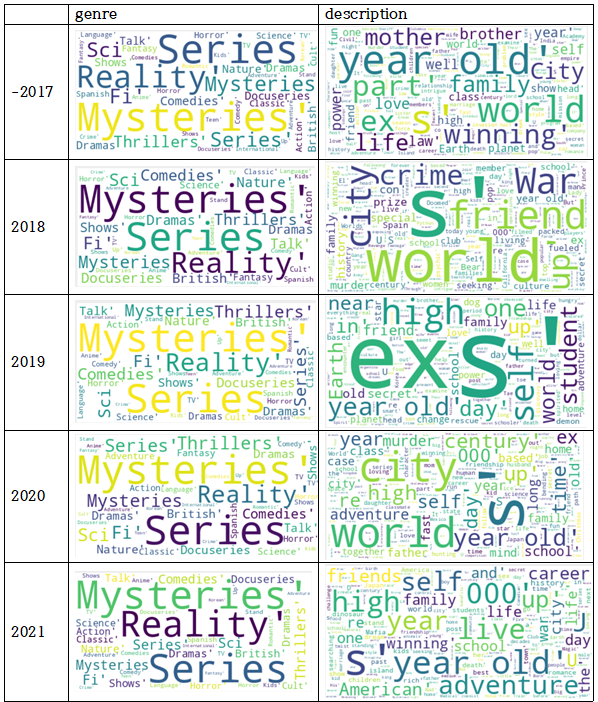

###c. genre, description of Movie

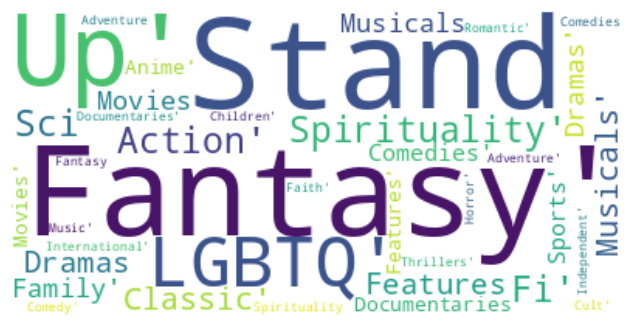

In [283]:
wordCloud(movie_df2017['genre'],'movie_df2017_genre')
wordCloud(movie_df2018['genre'],'movie_df2018_genre')
wordCloud(movie_df2019['genre'],'movie_df2019_genre')
wordCloud(movie_df2020['genre'],'movie_df2020_genre')
wordCloud(movie_df2021['genre'],'movie_df2021_genre')

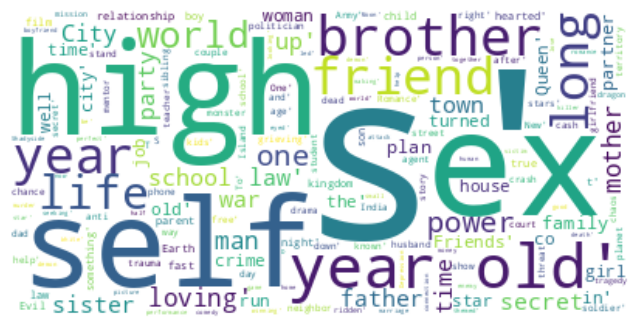

In [284]:
wordCloud(movie_df2017['description'],'movie_df2017_description')
wordCloud(movie_df2018['description'],'movie_df2018_description')
wordCloud(movie_df2019['description'],'movie_df2019_description')
wordCloud(movie_df2020['description'],'movie_df2020_description')
wordCloud(movie_df2021['description'],'movie_df2021_description')

- 영화 장르는 로맨틱, 스릴러, 뮤지컬
- 내용은 self, father, mother, girl friend 등의 나와 주변인에 대한 이야기기 

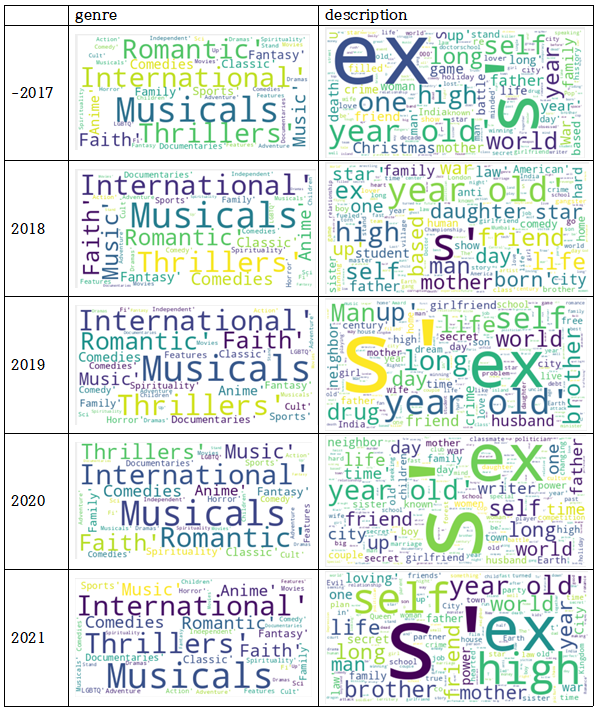

##(4) 관람 등급 분석

###a. type 별 관람 등급 

In [285]:
#rating
df_rating=pd.DataFrame()
df_rating = df1.groupby(df1['rating']).sum()



df_rating = df_rating.drop('release_year', axis =1)

df_rating

type_Movie  type_TV Show
rating                            
G               41.0           0.0
NC-17            3.0           0.0
NR              75.0           5.0
PG             287.0           0.0
PG-13          490.0           0.0
R              800.0           3.0
TV-14         1427.0         733.0
TV-G           126.0          94.0
TV-MA         2063.0        1146.0
TV-PG          541.0         323.0
TV-Y           131.0         176.0
TV-Y7          139.0         195.0
TV-Y7-FV         5.0           1.0
UR               3.0           0.0

In [286]:
#무비 기준으로 솔팅
#TV-MA"는 TV Parental Guidelines에서 성인용으로 설계된 TV 프로그램에 할당 한 등급
#영화 등급을 사용하면 동등한 등급은 "R"또는 "NC-17" => 그럼 합쳐버리자

df_rating_movie = df_rating.sort_values(by = 'type_Movie', ascending = False)
print(df_rating_movie)
# df_rating_movie.loc['TV-MA'] =  df_rating_movie.loc['TV-MA',] + df_rating_movie.loc['R',] + df_rating_movie.loc['NC-17',] 
# df_rating_movie = df_rating_movie.drop(['R'], axis=0)
# df_rating_movie = df_rating_movie.drop(['NC-17'], axis=0)
df_rating_movie

          type_Movie  type_TV Show
rating                            
TV-MA         2063.0        1146.0
TV-14         1427.0         733.0
R              800.0           3.0
TV-PG          541.0         323.0
PG-13          490.0           0.0
PG             287.0           0.0
TV-Y7          139.0         195.0
TV-Y           131.0         176.0
TV-G           126.0          94.0
NR              75.0           5.0
G               41.0           0.0
TV-Y7-FV         5.0           1.0
NC-17            3.0           0.0
UR               3.0           0.0


type_Movie  type_TV Show
rating                            
TV-MA         2063.0        1146.0
TV-14         1427.0         733.0
R              800.0           3.0
TV-PG          541.0         323.0
PG-13          490.0           0.0
PG             287.0           0.0
TV-Y7          139.0         195.0
TV-Y           131.0         176.0
TV-G           126.0          94.0
NR              75.0           5.0
G               41.0           0.0
TV-Y7-FV         5.0           1.0
NC-17            3.0           0.0
UR               3.0           0.0

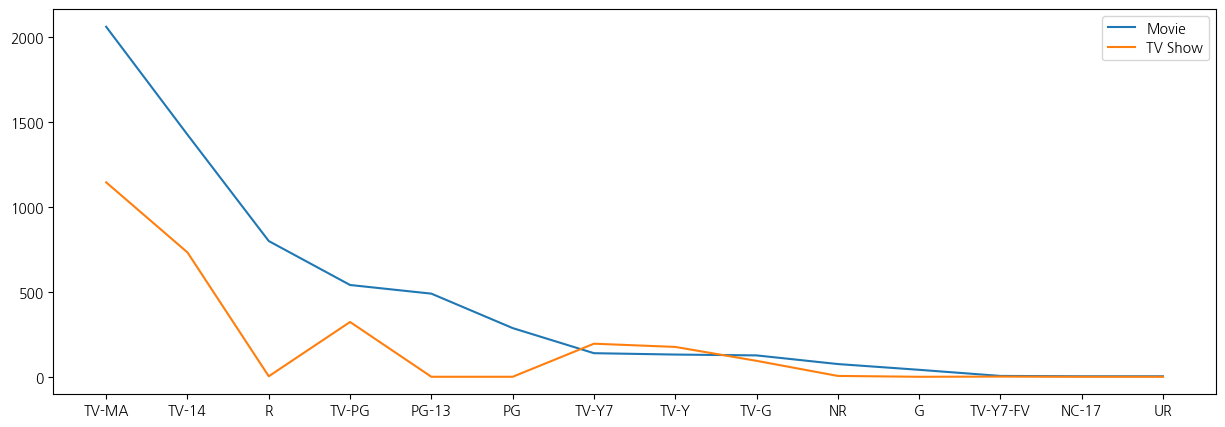

In [289]:
fig = plt.subplots(figsize=(15,5))

plt.plot(df_rating_movie.index, df_rating_movie['type_Movie'])
plt.plot(df_rating_movie.index, df_rating_movie['type_TV Show'])
# plt.plot(df_rating.index, df_rating['difference'])
# plt.plot(df_rating.index, df_rating['sum'])
plt.legend(['Movie', 'TV Show'])
plt.show()


#여튼 성인용이 많기는 한데 트렌드가 변할 수 있음.

###b. 연도별 관람 등급

In [290]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          2676 non-null   object        
 1   type             2676 non-null   object        
 2   title            2676 non-null   object        
 3   director         2676 non-null   object        
 4   cast             2676 non-null   object        
 5   date_added       2676 non-null   object        
 6   release_year     2676 non-null   int64         
 7   rating           2676 non-null   object        
 8   duration         2676 non-null   object        
 9   genre            2676 non-null   object        
 10  description      2676 non-null   object        
 11  datetime_added   2676 non-null   datetime64[ns]
 12  YearMonth_added  2676 non-null   datetime64[ns]
 13  year_added       2676 non-null   int64         
 14  made_country     2676 non-null   object 

In [291]:
tv_df['rating'].value_counts()

TV-MA       1146
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              3
TV-Y7-FV       1
Name: rating, dtype: int64

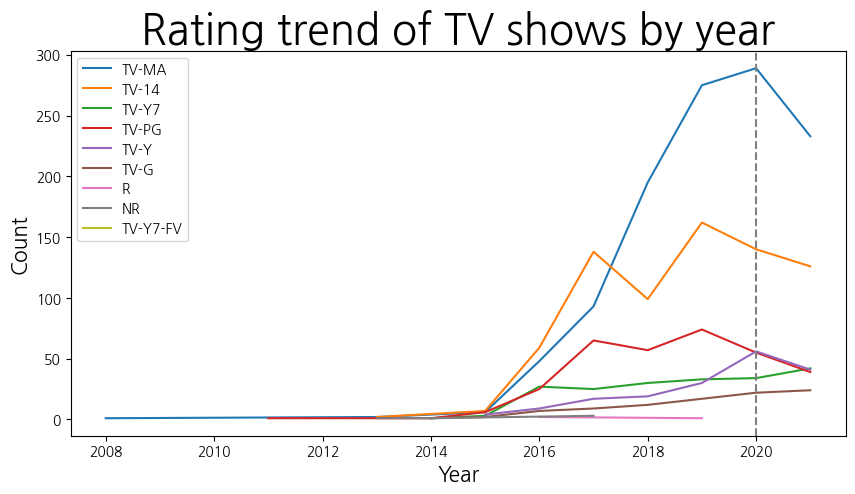

In [292]:
# 연도별 tv 쇼의 Rating 추세? 확인
tv_rating = tv_df.groupby(['year_added','rating']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(10,5))
for rating in tv_df['rating'].unique():
  ax.plot(tv_rating[tv_rating['rating']==rating]['year_added'],tv_rating[tv_rating['rating']==rating]['count'], label=rating)

ax.axvline(x=2020, color='gray', linestyle='--')
ax.set_xlabel('Year',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
ax.legend()
plt.title('Rating trend of TV shows by year', fontsize = 30)
plt.show()

20년에 증가하는 추세를 가지는 것은 TV-Y7, TV-G 이다.\
그러나 데이터량을 고려하여 TV-MA는 여전히 우세

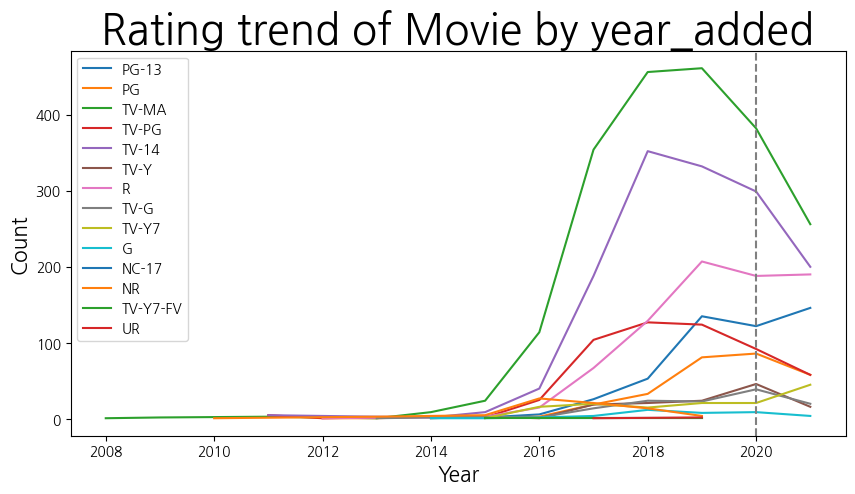

In [293]:
# 연도별 movie Rating 추세 확인
movie_rating = movie_df.groupby(['year_added','rating']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(10,5))
for rating in movie_df['rating'].unique():
  ax.plot(movie_rating[movie_rating['rating']==rating]['year_added'],movie_rating[movie_rating['rating']==rating]['count'], label=rating)

ax.axvline(x=2020, color='gray', linestyle='--')
ax.set_xlabel('Year',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
ax.legend()
plt.title('Rating trend of Movie by year_added', fontsize = 30)
plt.show()

movie의 rating은 2020년에 TV-Y7, R, NC-17이 상승세를 보인다.

##(5) 감독 및 인물 분석

In [294]:
# Top Director 10 :넷플릭스가 선호하는 감독

from matplotlib import pyplot as plt
import seaborn as sns

top_directors = movie_df['director'].str.split(',',expand=True).stack()
top_directors= pd.DataFrame(top_directors, columns = ['director'])
top_directors.columns = ['director']

directors = top_directors.groupby(['director']).size().reset_index(name='counts')
directors = directors.sort_values(by='counts',ascending=False)
directors = directors[directors['director'] != 'No Director']
directors.head(11)



director  counts
4874              unknown     188
3818        Rajiv Chilaka      22
234             Jan Suter      18
3865          Raúl Campos      18
4429          Suhas Kadav      16
2308            Jay Karas      15
3067         Marcus Raboy      15
1289  Cathy Garcia-Molina      13
3135      Martin Scorsese      12
4840      Youssef Chahine      12
2305          Jay Chapman      12

In [295]:
# Top Cast 10 :넷플릭스가 선호하는 배우

top_cast = movie_df['cast'].str.split(',',expand=True).stack()
top_cast= pd.DataFrame(top_cast, columns = ['cast'])
top_cast.columns = ['cast']

cast = top_cast.groupby(['cast']).size().reset_index(name='counts')
cast = cast.sort_values(by='counts',ascending=False)
cast = cast[cast['cast'] != 'No cast']
cast.head(11)

cast  counts
27869          unknown     475
1946       Anupam Kher      38
19235     Rupa Bhimani      27
16781          Om Puri      27
27291   Shah Rukh Khan      26
17025     Paresh Rawal      25
3109       Boman Irani      25
11219    Julie Tejwani      24
24247     Akshay Kumar      23
18089      Rajesh Kava      21
11508   Kareena Kapoor      20

##(6) 제작 국가에 대한 분석 

<Figure size 1500x1000 with 0 Axes>

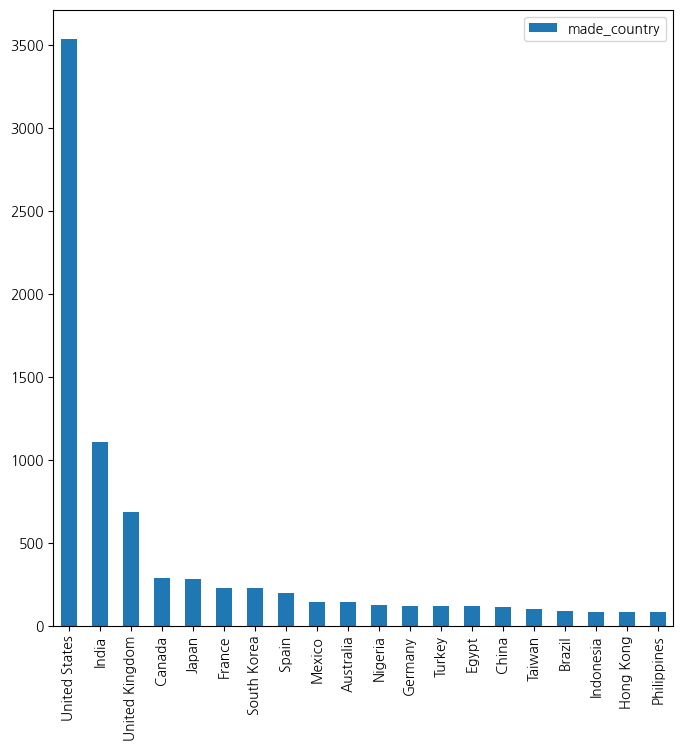

In [296]:
# country 순위 시각화
country_df = df1['made_country'].value_counts()
country_df = pd.DataFrame(country_df)
country_df

# 상위 20개 
count_m = country_df.nlargest(20, 'made_country')

plt.figure(figsize=(15,10)) 
count_m.plot(kind = 'bar')
plt.show() 

###a. TV Show

In [297]:
tv_df.head()

show_id     type                  title         director  \
0      s2  TV Show          Blood & Water          unknown   
1      s3  TV Show              Ganglands  Julien Leclercq   
2      s4  TV Show  Jailbirds New Orleans          unknown   
3      s5  TV Show           Kota Factory          unknown   
4      s6  TV Show          Midnight Mass    Mike Flanagan   

                                                cast          date_added  \
0  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  September 24, 2021   
1  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  September 24, 2021   
2                                            unknown  September 24, 2021   
3  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...  September 24, 2021   
4  Kate Siegel, Zach Gilford, Hamish Linklater, H...  September 24, 2021   

   release_year rating   duration  \
0          2021  TV-MA  2 Seasons   
1          2021  TV-MA   1 Season   
2          2021  TV-MA   1 Season   
3          2021  TV-MA  2 Seasons   
4          2021  TV-MA   1 Season   

                                               genre  \
0    International TV Shows, TV Dramas, TV Mysteries   
1  Crime TV Shows, International TV Shows, TV Act...   
2                             Docuseries, Reality TV   
3  International TV Shows, Romantic TV Shows, TV ...   
4                 TV Dramas, TV Horror, TV Mysteries   

                                         description datetime_added  \
0  After crossing paths at a party, a Cape Town t...     2021-09-24   
1  To protect his family from a powerful drug lor...     2021-09-24   
2  Feuds, flirtations and toilet talk go down amo...     2021-09-24   
3  In a city of coaching centers known to train I...     2021-09-24   
4  The arrival of a charismatic young priest brin...     2021-09-24   

  YearMonth_added  year_added  made_country  
0      2021-09-01        2021  South Africa  
1      2021-09-01        2021  South Africa  
2      2021-09-01        2021  South Africa  
3      2021-09-01        2021         India  
4      2021-09-01        2021         India

<Figure size 1500x1000 with 0 Axes>

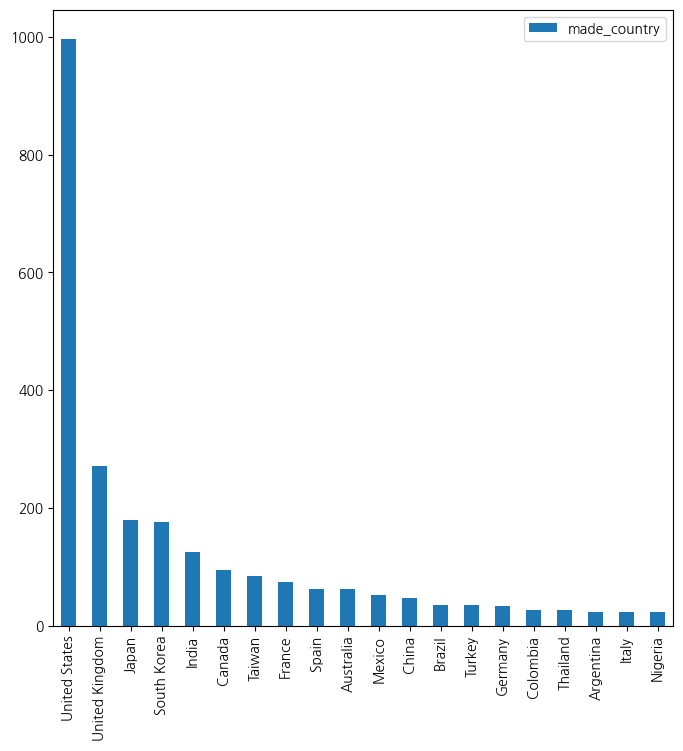

In [298]:
# country 순위 시각화
country_df = tv_df['made_country'].value_counts()
country_df = pd.DataFrame(country_df)
country_df

# 상위 20개 
count_m = country_df.nlargest(20, 'made_country')

plt.figure(figsize=(15,10)) 
count_m.plot(kind = 'bar')
plt.show() 

In [299]:
# tv show 를 제작한 국가.
vc1 = tv_df['made_country'].value_counts().reset_index()
vc1 = vc1.rename(columns = {'index':'made_country', 'made_country':'count'})

country_tv=list(tv_df['made_country'])

co_tv=[]
for i in country_tv:
    k = list(i.split(', '))
    for j in k:
        co_tv.append(j)

from collections import Counter
g = Counter(co_tv)
counts = pd.DataFrame(g.items(), columns=['label', 'counts'])

import plotly.express as px
px.choropleth(counts,
              locations='label',
              locationmode='country names',
              color='counts',
              projection='kavrayskiy7', #지도모양 
              scope='world',
              title='국가별 TV 컨텐츠 제작 수',
              color_continuous_scale=px.colors.sequential.Sunsetdark)

###b. Movie

<Figure size 1500x1000 with 0 Axes>

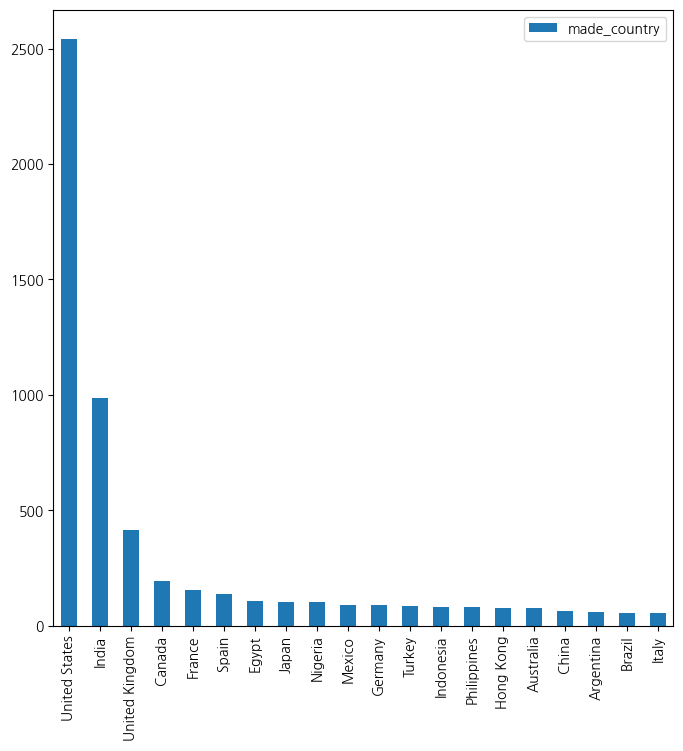

In [300]:
# country 시각화
country_df = movie_df['made_country'].value_counts()
country_df = pd.DataFrame(country_df)
country_df

# 상위 20개 
count_m = country_df.nlargest(20, 'made_country')
count_m

plt.figure(figsize=(15,10)) 
count_m.plot(kind = 'bar')
plt.show() 

In [301]:
# movie 를 제작한 국가.
vc1 = movie_df['made_country'].value_counts().reset_index()
vc1 = vc1.rename(columns = {'index':'made_country', 'made_country':'count'})

country_movie=list(movie_df['made_country'])

co_movie=[]
for i in country_movie:
    k = list(i.split(', '))
    for j in k:
        co_movie.append(j)

from collections import Counter
g = Counter(co_movie)
counts = pd.DataFrame(g.items(), columns=['label', 'counts'])

import plotly.express as px
px.choropleth(counts,
              locations='label',
              locationmode='country names',
              color='counts',
              projection='kavrayskiy7',
              scope='world',
              title='국가별 영화 제작 수',
              color_continuous_scale=px.colors.sequential.Purpor)

##(7) 영화의 상영 시간 분석 
- TV Show의 경우 시즌제로 상영 시간에 대한 분석이 어려움.

0        90.0
1        91.0
2       125.0
3       104.0
4       127.0
        ...  
6126     96.0
6127    158.0
6128     88.0
6129     88.0
6130    111.0
Name: duration, Length: 6131, dtype: float64

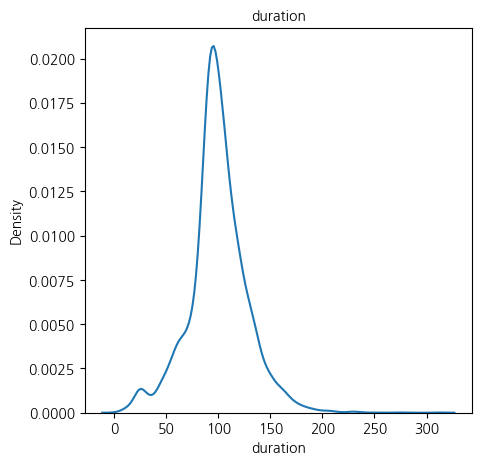

In [302]:
#duration of movie
# movie_df=df1[df1['type']=='Movie']
movie_df['duration']=movie_df['duration'].str.replace(' min','')
movie_df['duration']=movie_df['duration'].astype(float)

fig, ax = plt.subplots(figsize=(5,5))
sns.kdeplot(data=movie_df['duration'])
ax.set_title('duration', fontsize=10)

movie_df['duration']

In [303]:
df5 ={}
df5 = df1.groupby(movie_df['duration']).sum()
max = df5['type_Movie'].max()


df5
# df2 = df1['type_Movie'].groupby(df1['datetime_added']).sum()

release_year  type_Movie  type_TV Show
duration                                        
3.0               2014         1.0           0.0
5.0               2020         1.0           0.0
8.0               2021         0.0           1.0
9.0               2010         1.0           0.0
10.0              2013         1.0           0.0
...                ...         ...           ...
233.0             2006         1.0           0.0
237.0             2018         1.0           0.0
253.0             2020         1.0           0.0
273.0             2010         1.0           0.0
312.0             2019         1.0           0.0

[205 rows x 3 columns]

In [304]:
for x in df5['type_Movie']:
    running_time = df5[df5['type_Movie']==max].index[0]

print(running_time)

90.0


영화의 상영 시간은 90분이 적당하겠음. 

# Extra Work : about Korea
한국의 컨텐츠가 어땠길래 

In [305]:
df_SKorea=df1[df1['made_country']=='South Korea']
df_SKorea

show_id     type                        title       director  \
104     s105  TV Show          Tayo the Little Bus        unknown   
124     s125  TV Show  Pororo - The Little Penguin        unknown   
289     s290  TV Show            The Crowned Clown        unknown   
456     s457  TV Show             Her Private Life        unknown   
545     s546  TV Show         YooHoo to the Rescue        unknown   
...      ...      ...                          ...            ...   
8463   s8464    Movie       The President's Barber  Chan-sang Lim   
8467   s8468    Movie                   The Prison       Na Hyeon   
8575   s8576  TV Show              This Is My Love        unknown   
8613   s8614    Movie               Train to Busan   Sang-ho Yeon   
8684   s8685  TV Show                      Vroomiz        unknown   

                                                   cast         date_added  \
104                          Robyn Slade, Kami Desilets  September 6, 2021   
124                                             unknown  September 2, 2021   
289   Yeo Jin-goo, Lee Se-young, Kim Sang-kyung, Jun...    August 10, 2021   
456   Park Min-young, Kim Jae-uk, Ahn Bo-hyun, Jung ...      July 15, 2021   
545   Kira Buckland, Ryan Bartley, Bryce Papenbrook,...       July 6, 2021   
...                                                 ...                ...   
8463  Kang-ho Song, So-ri Moon, Jae-eung Lee, Yeong-...    October 1, 2017   
8467  Suk-kyu Han, Rae-won Kim, Kyeong-yeong Lee, Wo...  November 18, 2017   
8575  Jin-mo Joo, Sa-rang Kim, Junior, Ja-in Lee, Su...       May 22, 2017   
8613  Gong Yoo, Yu-mi Jung, Dong-seok Ma, Soo-an Kim...     March 18, 2017   
8684  Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...     August 1, 2017   

      release_year rating   duration  \
104           2016   TV-Y  2 Seasons   
124           2013  TV-Y7  3 Seasons   
289           2019  TV-14   1 Season   
456           2019  TV-14   1 Season   
545           2020   TV-Y  3 Seasons   
...            ...    ...        ...   
8463          2004  TV-MA    116 min   
8467          2017  TV-MA    125 min   
8575          2015  TV-14   1 Season   
8613          2016  TV-MA    118 min   
8684          2016   TV-Y  3 Seasons   

                                                  genre  \
104                           Kids' TV, Korean TV Shows   
124                           Kids' TV, Korean TV Shows   
289   International TV Shows, Romantic TV Shows, TV ...   
456   International TV Shows, Romantic TV Shows, TV ...   
545                           Kids' TV, Korean TV Shows   
...                                                 ...   
8463             Comedies, Dramas, International Movies   
8467   Action & Adventure, Dramas, International Movies   
8575  International TV Shows, Korean TV Shows, Roman...   
8613  Action & Adventure, Horror Movies, Internation...   
8684                          Kids' TV, Korean TV Shows   

                                            description datetime_added  \
104   As they learn their routes around the busy cit...     2021-09-06   
124   On a tiny island, Pororo the penguin has fun a...     2021-09-02   
289   Standing in for an unhinged Joseon king, a loo...     2021-08-10   
456   An art curator's life unravels, as she tries t...     2021-07-15   
545   In a series of magical missions, quick-witted ...     2021-07-06   
...                                                 ...            ...   
8463  The personal barber to the president, as well ...     2017-10-01   
8467  A cop-turned-convict discovers a crime syndica...     2017-11-18   
8575  A renowned actor who is still pining over the ...     2017-05-22   
8613  As a zombie outbreak sweeps the country, a dad...     2017-03-18   
8684  For these half-car, half-animal friends, each ...     2017-08-01   

     YearMonth_added year_added made_country  type_Movie  type_TV Show  
104       2021-09-01       2021  South Korea         0.0           1.0  
124       2021

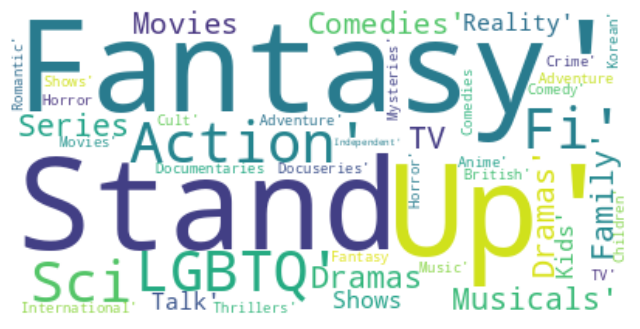

In [306]:
#Word Cloud of Genre
wordCloud(df_SKorea['genre'],'df_SKorea_genre')

- 다양한 장르가 있음.
        로맨틱, 애니, 스릴러, 리얼리티, 판타지, 코미디, 음악, 가족 등..

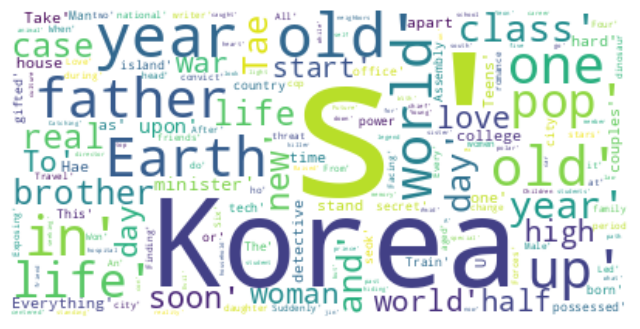

In [307]:
#Word Cloud of description
wordCloud(df_SKorea['description'],'df_SKorea_description')

# father

- 당연히 한국 배경인 것을 설명하거나 한국 제작을 강조함.
- father, brother 등의 가족에 관련한 내용임을 짐작할 수 있음. 
- 전체 컨텐츠에 보이지 않았던 woman은 여성의 이야기를 하고 있음. 

# 정리
- TV Show 부분에서는  
        미스터리와 리얼리티 장르
        모험의 이야기
        TV-G, TV-Y7, TV-MA 등급  
        미국, 영국, 한국 제작
        : 컨텐츠를 출시하는 것이 좋겠음. 

- Movie 부분에서는  
        로맨틱, 스릴러, 뮤지컬 장르  
        나 자신과 주변 사람들의 이야기  
        R, TV-Y7, NC-17 등급
        미국, 인도, 영국 제작  
        : 컨텐츠 출시

따 

.  
.  
.  
.  
.  
.  
.  
.  

단



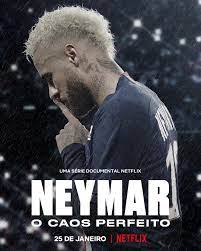

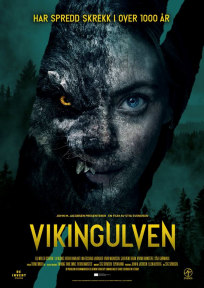

# 회고
- 도진영  
        (1) 프로젝트를 통해 새롭게 알게 된 것:
            다양한 시각화 라이브러리의 활용법과 필요성에 대한 고찰
        (2) 어려웠던 점 & 아쉬웠던 점:
            화려한 그래픽 라이브러리를 활용한다고해서 
            요점을 잘 나타내는 것은 아니다.  
            오히려 나타내려고 하는 바를 해칠 수 있다는 것을 확인함.
        (3) 좋았던 점 
            부족했던 시각화 라이브러리의 사용을 확인하고, 
            팀원들 간의 소통의 기회, 분업을 경험하고 git의 필요성을 더욱 깨달음.
            파이썬(+머신러닝)을 활용한 팀프로젝트 경험.

- 고주은  
        (1) 프로젝트를 통해 새롭게 알게 된 것 
            다른 단위의 데이터를 축을 공유하며 한 그래프에 표현할 수 있었음.
            여러 사람과의 협업에 있어 고려할 점들이 있어 github를 왜 쓰는지 확실히 알 수 있었음.  
            (변수 설정, 코드 합치기 등의 과정) 
        (2) 어려웠던 점 & 아쉬웠던 점  
            텍스트를 합리적인 방법으로 분석하는 방법에 대해 알지 못함.
        (3) 좋았던 점  
            집중력이 떨어질 때 팀원들이 있기에 힘낼 수 있었음.

- 유정희  
        (1) 프로젝트를 통해 새롭게 알게 된 것
            정말 다양한 시각화 그래프가 있다는 것을 알게 되었다.
            이번 프로젝트에서 새로운 시각화를 해 보았는데 평소 알던 그래프와 달라서 재미있었다.
            파이썬에서 잠깐 협업아닌 협업으로 코드를 작성해보긴 했지만 긴 내용의 프로젝트를 
            다른 사람과 함께 작업을 하다보니 github로 하는 협업의 필요성을 느끼게 되었다.
            넷플릭스는 친숙한 데이터라고 생각해서 결과에 대한 나름의 예상에 대해 쉽게 생각했는데 
            데이터를 통해 유의미한 근거와 인사이트를 얻는다는 것이 쉬운 일이 아니라는 것을 알게 되었다.
        (2) 어려웠던 점 & 아쉬웠던 점
            그동안은 지정된 방향으로 과제를 진행하다가 방향 제시 없이
            프로젝트의 목표부터 과정과 결론 도출까지 직접 해야한다는 것이 생각보다 막막했었다. 
            직접 작성을 해보니 내가 어떤 부분에서 잘 못하는 지를 알 수 있어서 앞으로 부족한 부분을 채우도록 해야겠다.
            또 데이터에서 수익이나, 관람자 수 같은 나름의 평가를 내릴 수 있는 지표가 없어서 조금 아쉬웠다.
            그래서 나름대로의 전제를 깔아서 데이터를 예상해 보았는데 프로젝트를 진행하며
            예측이 틀렸다는 것을 확인해가는 가정이 재미있으면서도 예상이 틀려서 아쉬운 기분이 들었다.
        (3) 좋았던 점
            내가 생각해내지 못한 것을 팀원들이 생각해내서 프로젝트를 
            수행하는 중에도 인사이트를 얻을 수 있었던 것이 좋았고, 모르는 것을 혼자
            찾아볼 때와 달리 지식을 공유하기 때문에 오래 끌 일을 금방 
            해결할 수 있었다.그리고 혼자 해볼 때와 달리 서로가 알고 있는 
            팁을 공유하고 어떤 식으로 작성하는 지 다른 사람의 방식을 알 수 있어서 
            더 도움이 됐던 것 같다. 또 혼자 하는게 아니라 함께 대화하면서 진행하는 거라 
            더 재미있게 프로젝트를 끝낼 수 있었던 것 같다😆

# Reference
- 컬럼 분리 (https://steadiness-193.tistory.com/22)
- 자연어처리 (http://ai4school.org/?page_id=2407) 
- 사이킷런을 이용한 원핫인코딩 (https://bigdatamaster.tistory.com/m/177)
- 데이터 분리 및 병합 (https://goodtogreate.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EB%A6%AC-%EB%B0%8F-%EB%B3%91%ED%95%A9-split-subset-merge)
- 상위 값 뽑기 (https://steadiness-193.tistory.com/218)
- 워드 클라우드(https://doitgrow.com/34)
- Counter (https://www.daleseo.com/python-collections-counter/)
- 이미지 저장하기 (https://codetorial.net/matplotlib/savefig.html) (https://cosmosproject.tistory.com/412)
- 넷플릭스 릴리즈 데이터 확인 https://ew.com/article/2014/10/15/friends-netflix/
- 데이터 합치기 속성 (https://rfriend.tistory.com/256)
- 넷플릭스 info (https://usa.newonnetflix.info/info/70281022)
- IMDB (https://www.imdb.com/?ref_=nv_home)
- 2개 기준 groupby (https://coding-grandpa.tistory.com/entry/PythonPandas-Groupby-%ED%95%A8%EC%88%98-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0)